## Comment 1 - We may have to rephrase the 'artefacts' metric. The way it was scored was where 1 was heavy artefacts and 5 was no artefacts. So to avoid confusion, we should call this 'absence of artefacts'. I did it in the text but can you please update the figures accordingly?

Response - Updated the refined results.xlsx with corrections and the required column name of "Absence of Artifacts" + Figures are also updated accordingly within the code.

In [ ]:
!rm -rf sample_data
!wget https://dl3.pushbulletusercontent.com/MQ1xc7yg8DobuL8U3f5SBxfkM19iLO2k/results.xlsx

--2024-10-11 10:54:10--  https://dl3.pushbulletusercontent.com/MQ1xc7yg8DobuL8U3f5SBxfkM19iLO2k/results.xlsx
Resolving dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)... 35.208.62.122
Connecting to dl3.pushbulletusercontent.com (dl3.pushbulletusercontent.com)|35.208.62.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12994 (13K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘results.xlsx’

results.xlsx        100%[===================>]  12.69K  --.-KB/s    in 0.005s  

2024-10-11 10:54:10 (2.71 MB/s) - ‘results.xlsx’ saved [12994/12994]



       Overall Realism  Clarity and Sharpness  Contrast and Brightness  \
count       100.000000             100.000000               100.000000   
mean          2.340000               1.730000                 2.680000   
std           0.986986               0.583528                 1.003831   
min           1.000000               1.000000                 1.000000   
25%           2.000000               1.000000                 2.000000   
50%           2.000000               2.000000                 2.000000   
75%           3.000000               2.000000                 3.000000   
max           5.000000               3.000000                 5.000000   

           Crowns      Roots  Cortical bone  Trabecular bone  Bone shape  \
count  100.000000  100.00000     100.000000       100.000000  100.000000   
mean     2.310000    2.09000       2.240000         2.480000    2.690000   
std      0.734366    0.51434       1.319014         1.058682    1.244747   
min      1.000000    1.00000 

<ipython-input-2-5bae1a385060>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overall Realism', data=df, palette='viridis')


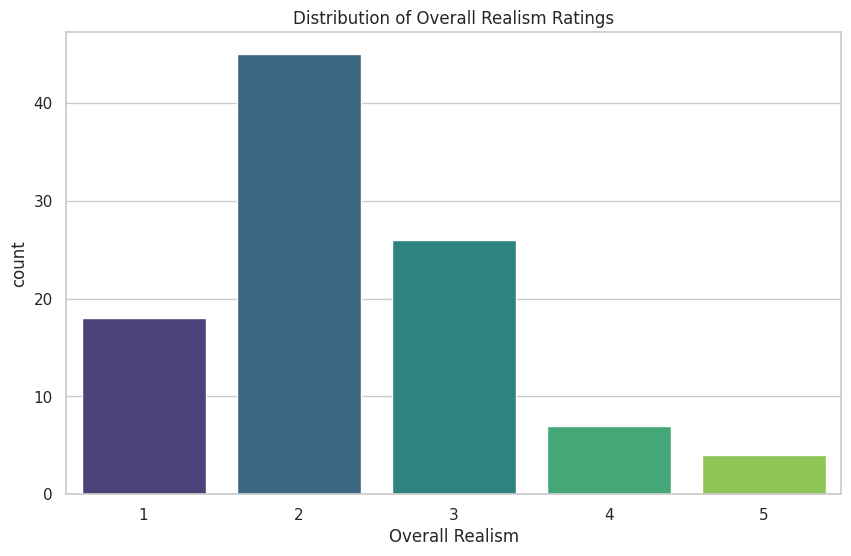

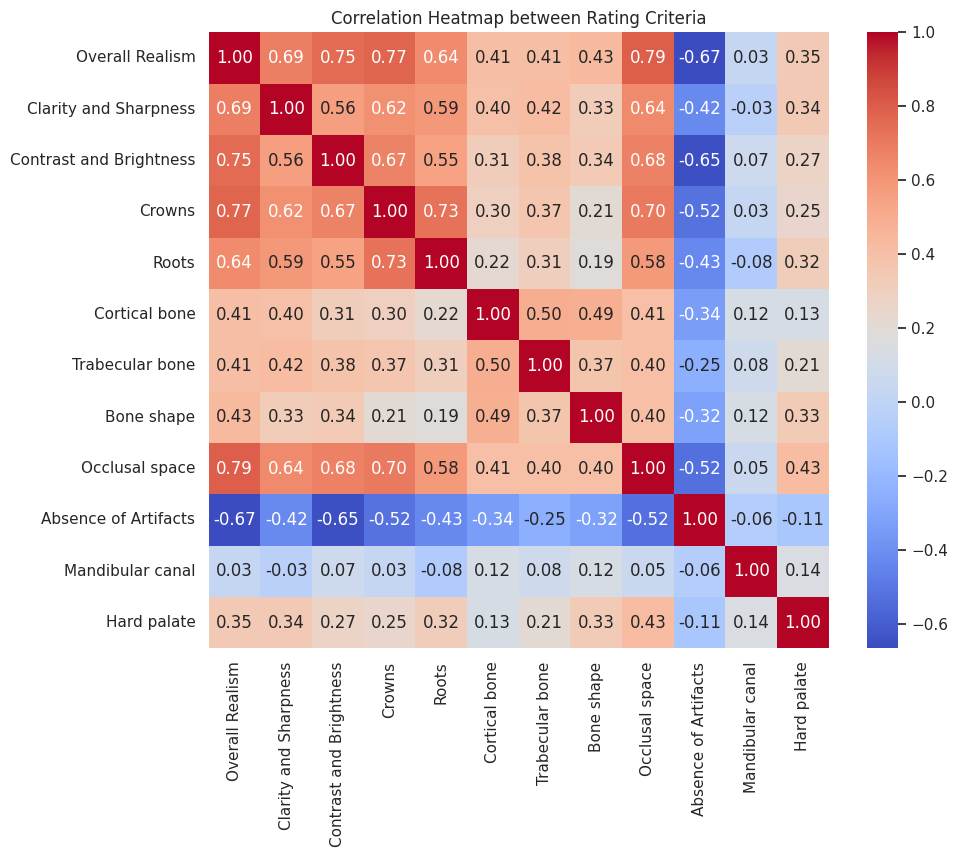

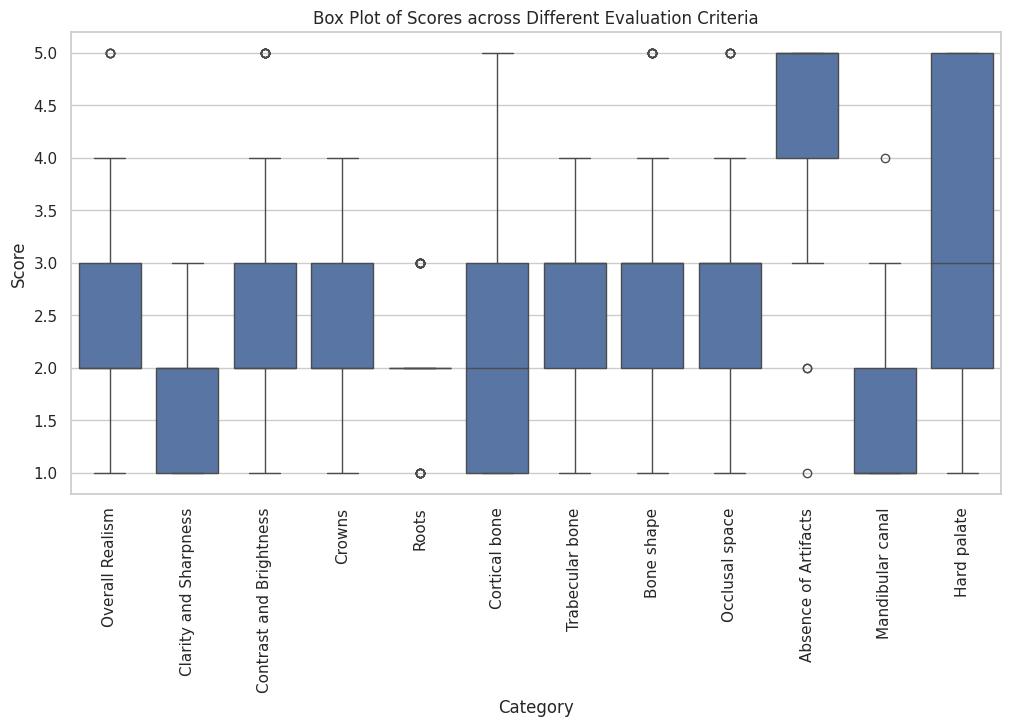

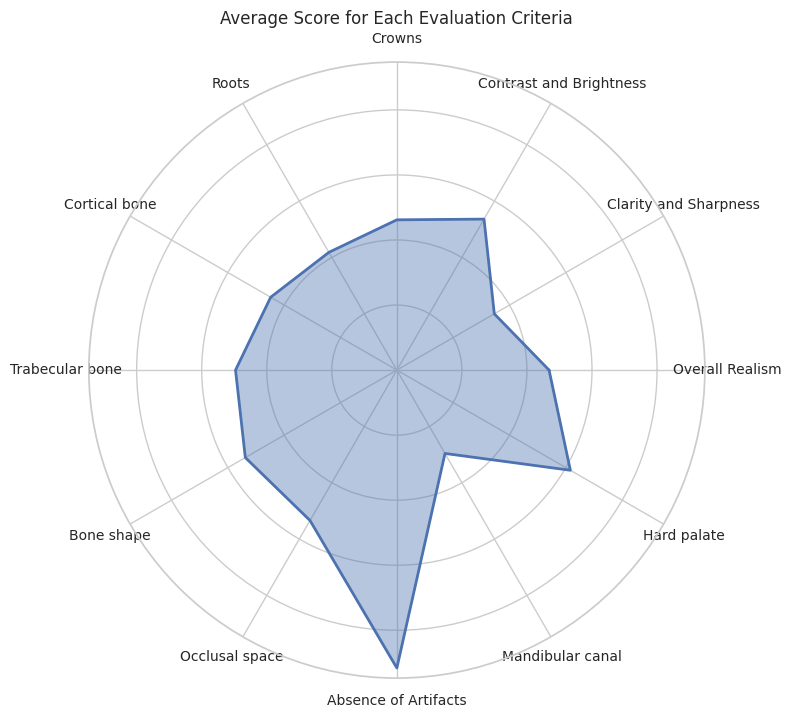

Top 5 images with highest Overall Realism:
    img_file  Overall Realism
0    image_1                5
1    image_2                5
7    image_8                5
84  image_85                5
13  image_14                4
Bottom 5 images with lowest Overall Realism:
    img_file  Overall Realism
6    image_7                1
8    image_9                1
10  image_11                1
20  image_21                1
21  image_22                1


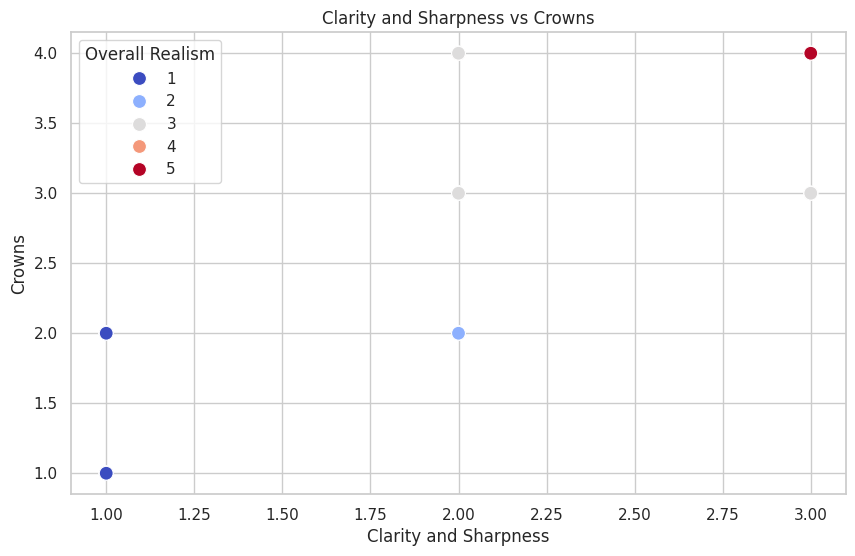

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file
df = pd.read_excel('results.xlsx')  # Replace with the path to your Excel file

# Basic statistics of the dataset
print(df.describe())

# Set default plot style
sns.set(style="whitegrid")

# Plotting Overall Realism distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Overall Realism', data=df, palette='viridis')
plt.title('Distribution of Overall Realism Ratings')
plt.show()

# Heatmap of the correlation between all criteria
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Rating Criteria')
plt.show()

# Box plot to visualize the range of scores for each category
plt.figure(figsize=(12,6))
df_melted = df.melt(id_vars=['img_file'], var_name='Category', value_name='Score')
sns.boxplot(x='Category', y='Score', data=df_melted)
plt.xticks(rotation=90)
plt.title('Box Plot of Scores across Different Evaluation Criteria')
plt.show()

# Radar chart for the average performance across all evaluation metrics
from math import pi

# Data preparation for radar chart
categories = list(df.columns[1:])
N = len(categories)

# Calculate the average score for each category
values = df[categories].mean().tolist()
values += values[:1]  # Close the loop for the radar chart

# Angle of each axis in the radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Initialize the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot and fill the radar chart
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, color='b', alpha=0.4)

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, rotation=45, size=10)
plt.title('Average Score for Each Evaluation Criteria')
plt.show()

# Individual image analysis (e.g., top 5 and bottom 5 images by Overall Realism)
top5_images = df.nlargest(5, 'Overall Realism')
bottom5_images = df.nsmallest(5, 'Overall Realism')

# Display the top 5 images with their scores
print("Top 5 images with highest Overall Realism:")
print(top5_images[['img_file', 'Overall Realism']])

# Display the bottom 5 images with their scores
print("Bottom 5 images with lowest Overall Realism:")
print(bottom5_images[['img_file', 'Overall Realism']])

# Scatter plot to show trends between criteria (e.g., Clarity vs. Crowns)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Clarity and Sharpness', y='Crowns', data=df, hue='Overall Realism', palette='coolwarm', s=100)
plt.title('Clarity and Sharpness vs Crowns')
plt.show()


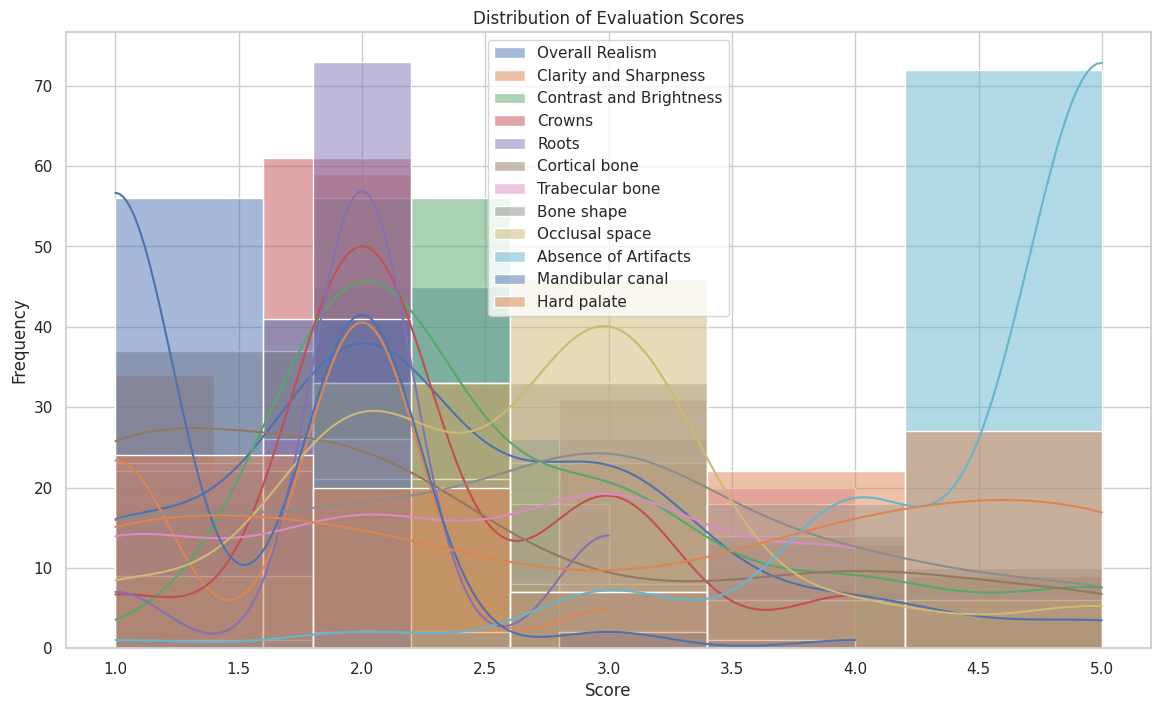

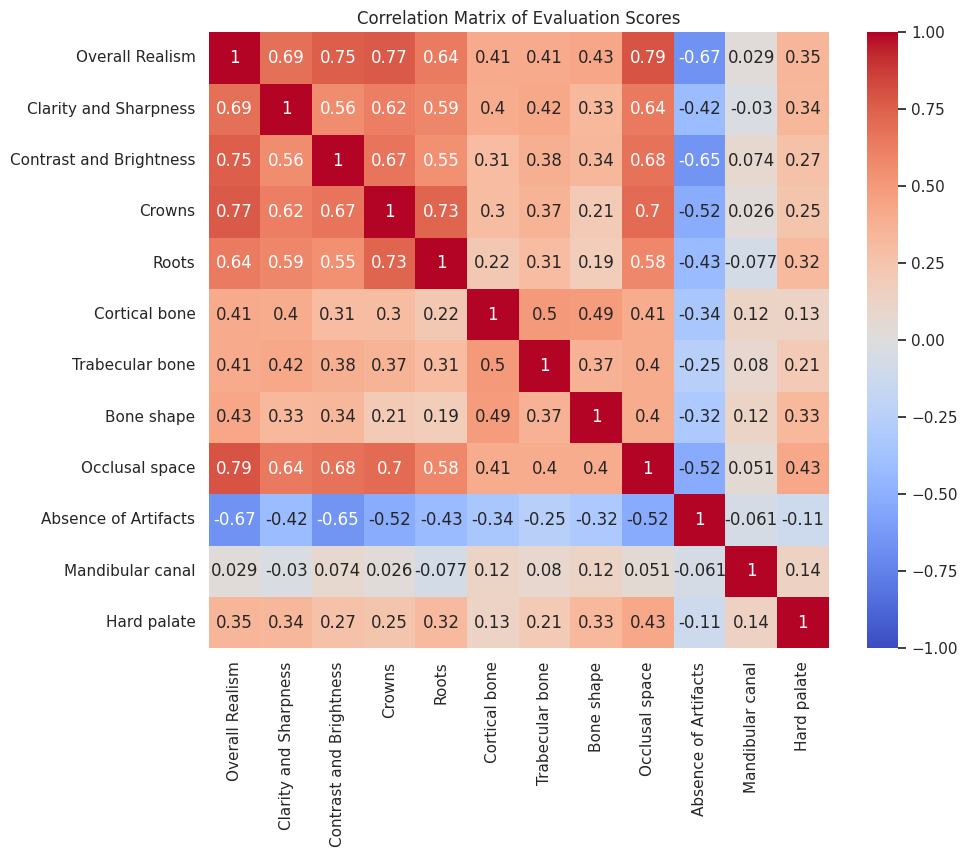

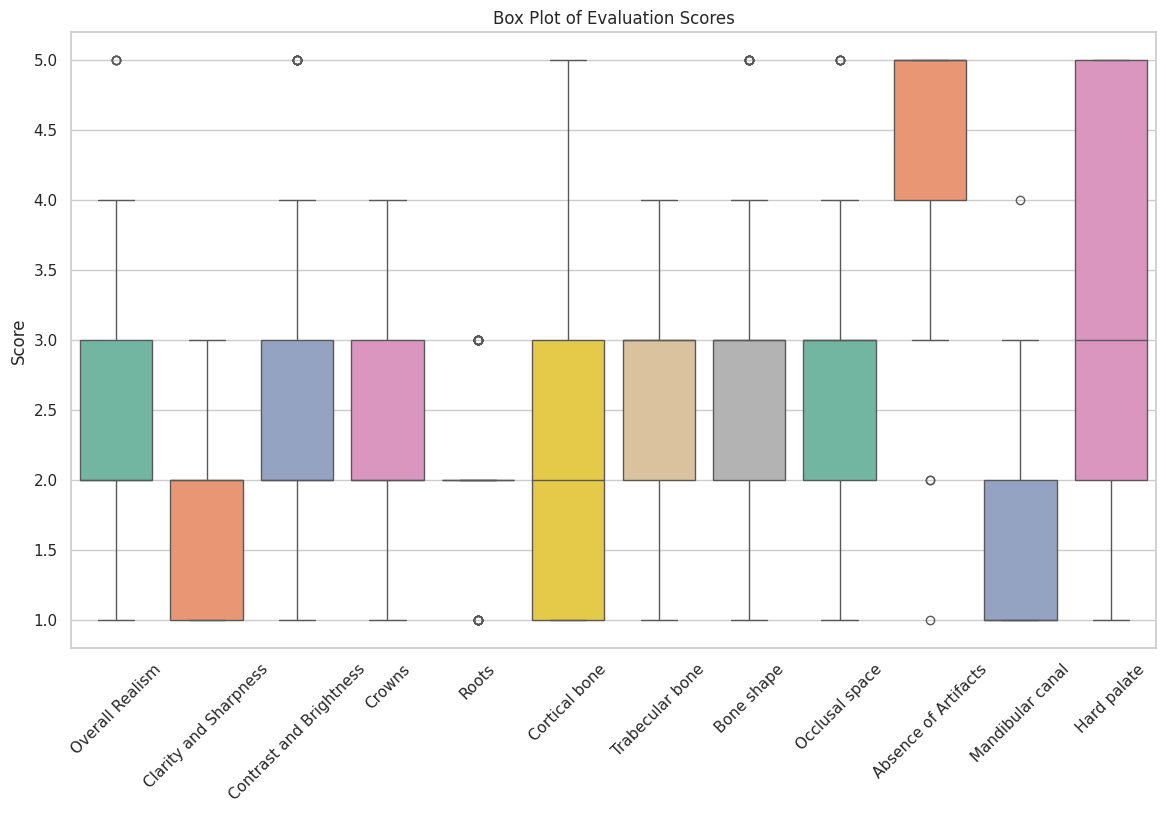

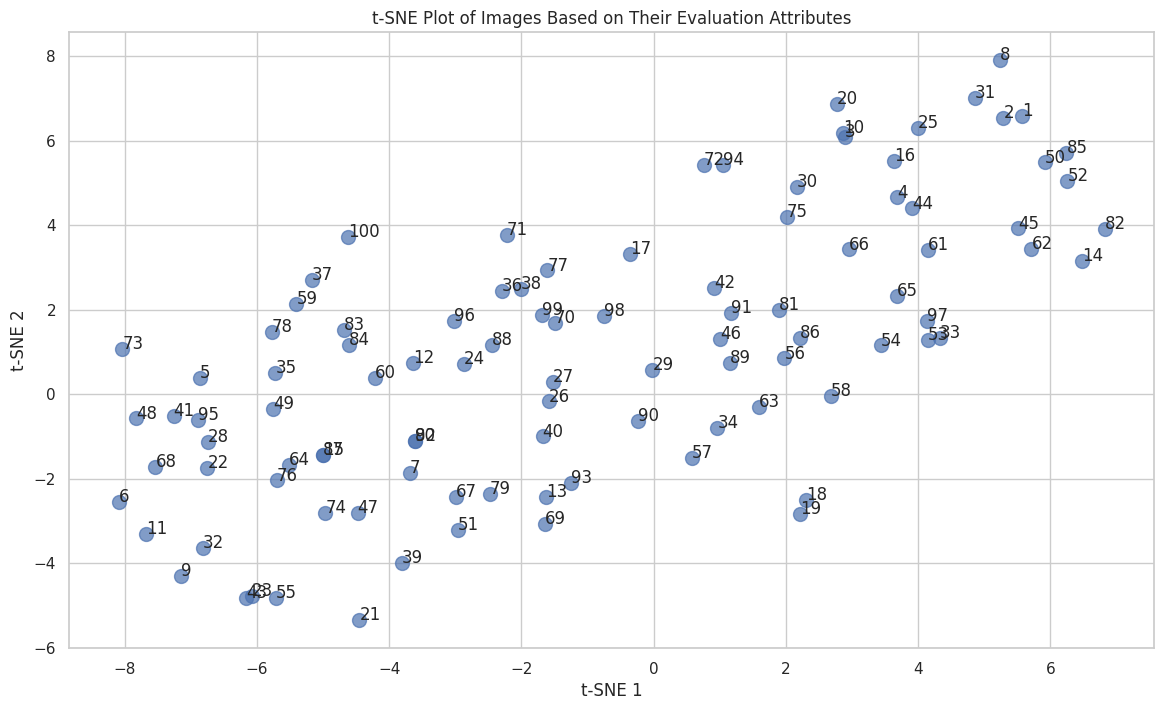

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Plot 1: Distribution of Scores
def plot_distribution(df, columns):
    plt.figure(figsize=(14, 8))
    for column in columns:
        sns.histplot(df[column], kde=True, label=column, bins=5)
    plt.legend()
    plt.title('Distribution of Evaluation Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

# Plot 2: Correlation Heatmap
def plot_correlation_matrix(df, columns):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Matrix of Evaluation Scores')
    plt.show()

# Plot 3: Box Plot for Detailed Insights
def plot_boxplot(df, columns):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[columns], palette='Set2')
    plt.xticks(rotation=45)
    plt.title('Box Plot of Evaluation Scores')
    plt.ylabel('Score')
    plt.show()

# Plot 4: t-SNE Plot for Image Clustering
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Plot t-SNE results
    plt.figure(figsize=(14, 8))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=100, alpha=0.7)

    # Annotate points with image file names
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]))

    plt.title('t-SNE Plot of Images Based on Their Evaluation Attributes')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.grid(True)
    plt.show()

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness', 'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape', 'Occlusal space', 'Absence of Artifacts', 'Mandibular canal', 'Hard palate']

# Calling the functions to generate plots
plot_distribution(data, columns)
plot_correlation_matrix(data, columns)
plot_boxplot(data, columns)
plot_tsne(data, columns)


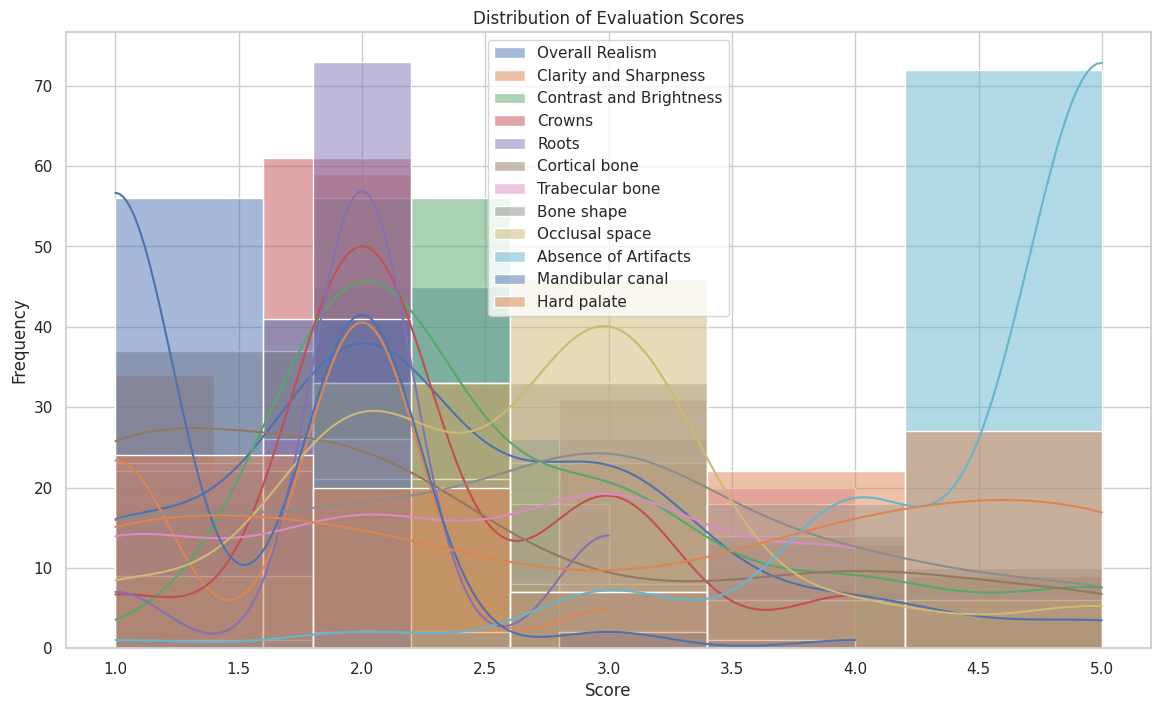

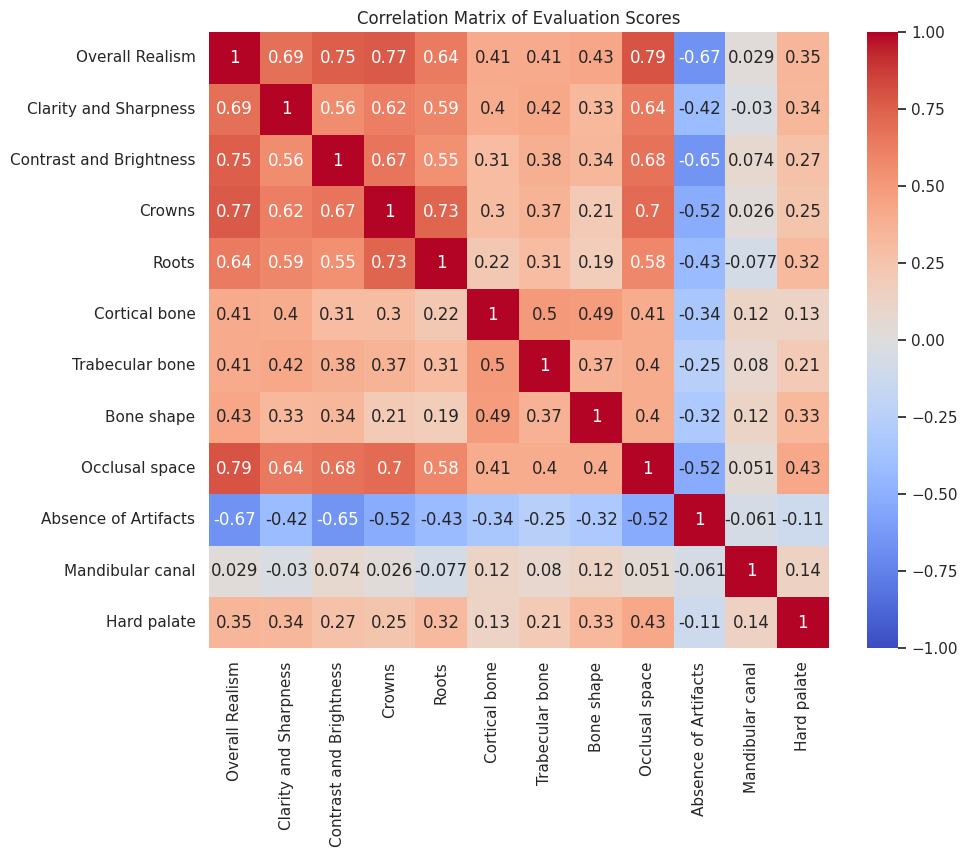

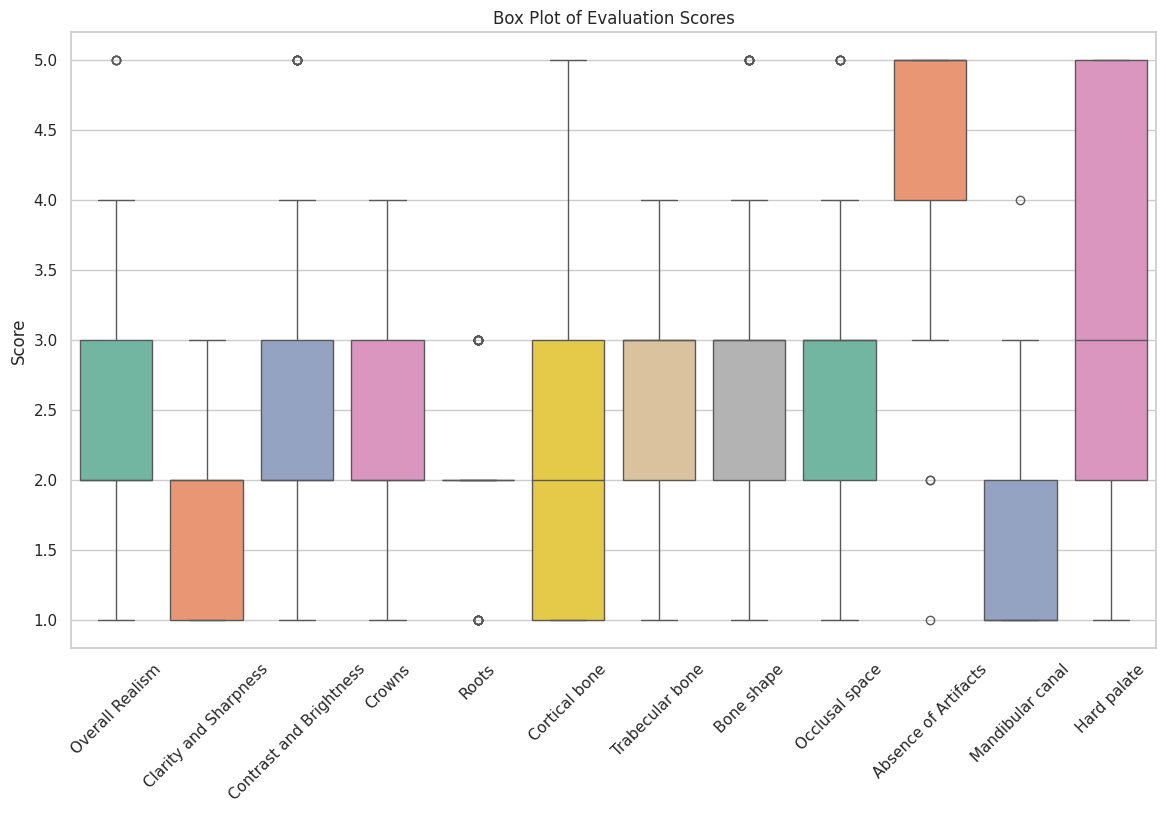

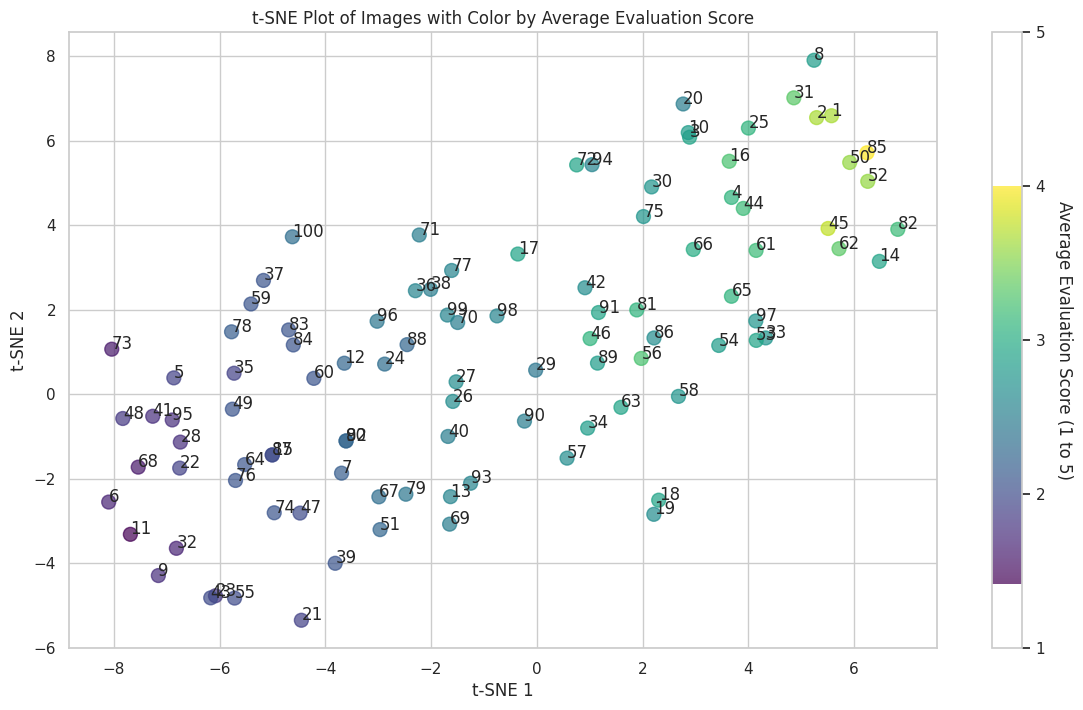

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Plot 1: Distribution of Scores
def plot_distribution(df, columns):
    plt.figure(figsize=(14, 8))
    for column in columns:
        sns.histplot(df[column], kde=True, label=column, bins=5)
    plt.legend()
    plt.title('Distribution of Evaluation Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()

# Plot 2: Correlation Heatmap
def plot_correlation_matrix(df, columns):
    plt.figure(figsize=(10, 8))
    corr_matrix = df[columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title('Correlation Matrix of Evaluation Scores')
    plt.show()

# Plot 3: Box Plot for Detailed Insights
def plot_boxplot(df, columns):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[columns], palette='Set2')
    plt.xticks(rotation=45)
    plt.title('Box Plot of Evaluation Scores')
    plt.ylabel('Score')
    plt.show()

# Plot 4: t-SNE Plot with Color Based on Evaluation Scores
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Compute average score for each image
    avg_scores = df[columns].mean(axis=1)

    # Plot t-SNE results with a colormap
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=avg_scores, cmap='viridis', s=100, alpha=0.7)

    # Annotate points with image file names
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]))

    # Add colorbar to show score range
    cbar = plt.colorbar(scatter)
    cbar.set_label('Average Evaluation Score (1 to 5)', rotation=270, labelpad=20)
    cbar.set_ticks(np.linspace(1, 5, 5))  # Set the ticks for 1 to 5 range

    plt.title('t-SNE Plot of Images with Color by Average Evaluation Score')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.grid(True)
    plt.show()

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness', 'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape', 'Occlusal space', 'Absence of Artifacts', 'Mandibular canal', 'Hard palate']

# Calling the functions to generate plots
plot_distribution(data, columns)
plot_correlation_matrix(data, columns)
plot_boxplot(data, columns)
plot_tsne(data, columns)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Ensure that the columns representing evaluation scores are within the range [1, 5]
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone',
           'Bone shape', 'Occlusal space', 'Absence of Artifacts',
           'Mandibular canal', 'Hard palate']

# Checking and ensuring scores are between 1 and 5
def check_score_range(df, columns):
    for column in columns:
        assert df[column].min() >= 1 and df[column].max() <= 5, f"Column {column} contains values out of the 1-5 range."

check_score_range(data, columns)

# Plot 4: t-SNE Plot with Color Based on Evaluation Scores
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Compute average score for each image
    avg_scores = df[columns].mean(axis=1)

    # Get the min and max of the average scores to scale color bar dynamically
    min_score, max_score = avg_scores.min(), avg_scores.max()

    # Plot t-SNE results with a colormap
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=avg_scores, cmap='viridis', s=100, alpha=0.7)

    # Annotate points with image file names (assuming filenames have numbers separated by underscores)
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9)

    # Add colorbar, dynamically scaled according to min and max of average scores
    cbar = plt.colorbar(scatter)
    cbar.set_label('Average Evaluation Score', rotation=270, labelpad=20)
    cbar.mappable.set_clim(vmin=min_score, vmax=max_score)  # Dynamically set color limits
    cbar.set_ticks(np.linspace(min_score, max_score, 5))  # Set ticks for the range

    plt.title('t-SNE Plot of Images with Color by Average Evaluation Score', fontsize=16)
    plt.xlabel('t-SNE 1', fontsize=14)
    plt.ylabel('t-SNE 2', fontsize=14)
    # plt.grid(True)

    # Save the figure as a PDF
    plt.savefig('tsne_plot_average_evaluation_score.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
    plt.close()  # Close the figure

# Calling the function to generate the t-SNE plot with dynamic color scaling
plot_tsne(data, columns)


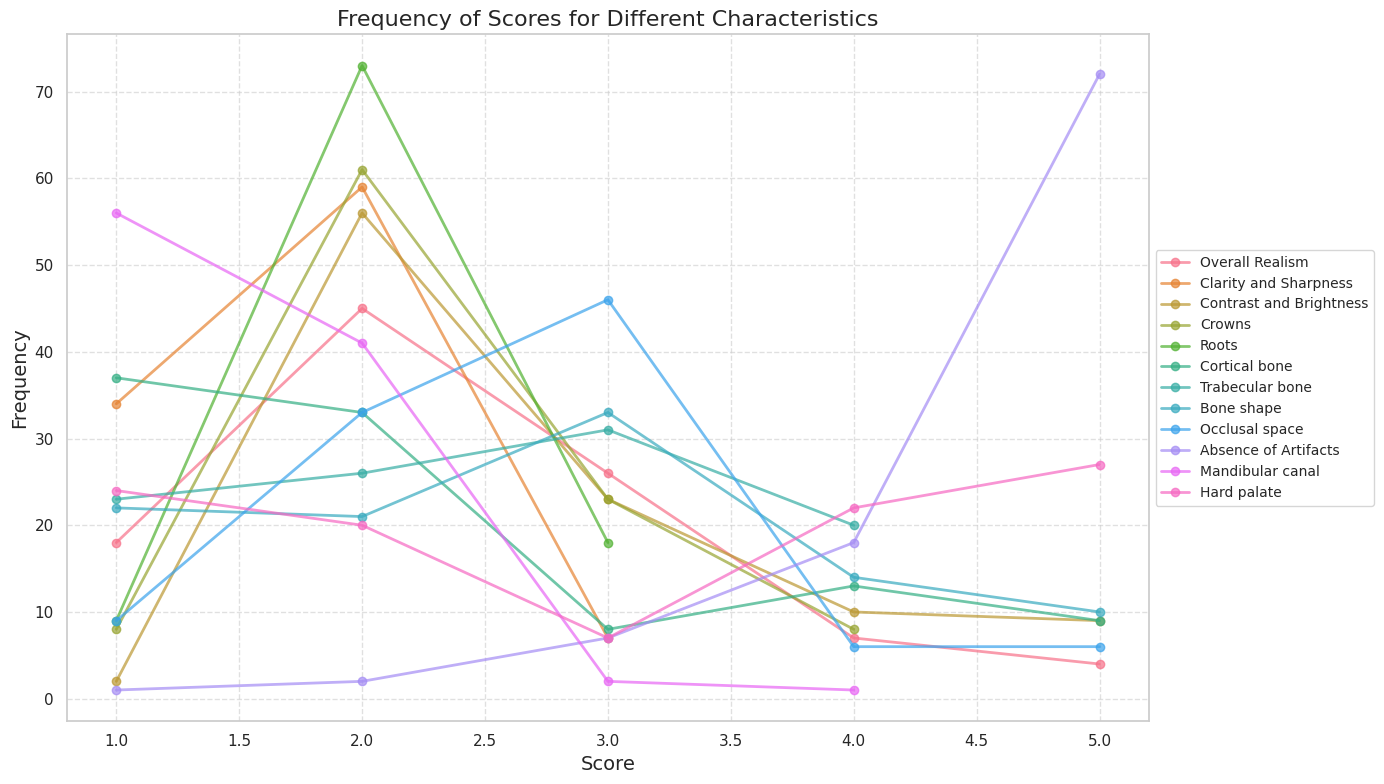

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample columns (replace with your actual characteristic columns)
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone',
           'Bone shape', 'Occlusal space', 'Absence of Artifacts',
           'Mandibular canal', 'Hard palate']

# Sample DataFrame (replace 'data' with your actual DataFrame)
# Assuming 'data' is already loaded and contains scores between 1 and 5 for the columns
# Frequency of scores for each characteristic
def plot_score_frequencies(df, columns):
    plt.figure(figsize=(14, 8))

    # Create a color palette
    palette = sns.color_palette("husl", len(columns))  # 'husl' ensures a wide range of distinct colors

    for idx, column in enumerate(columns):
        # Get the frequency of each score for the given characteristic
        score_counts = df[column].value_counts().sort_index()

        # Plot the frequency vs. score with lines and markers
        plt.plot(score_counts.index, score_counts.values,
                 label=column,
                 color=palette[idx],
                 marker='o',
                 alpha=0.7,
                 linewidth=2)

    # Enhance the plot aesthetics
    plt.title('Frequency of Scores for Different Characteristics', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add a legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

    # Show plot
    plt.tight_layout()
    plt.show()

# Call the function to generate the improved frequency vs. score plot
plot_score_frequencies(data, columns)


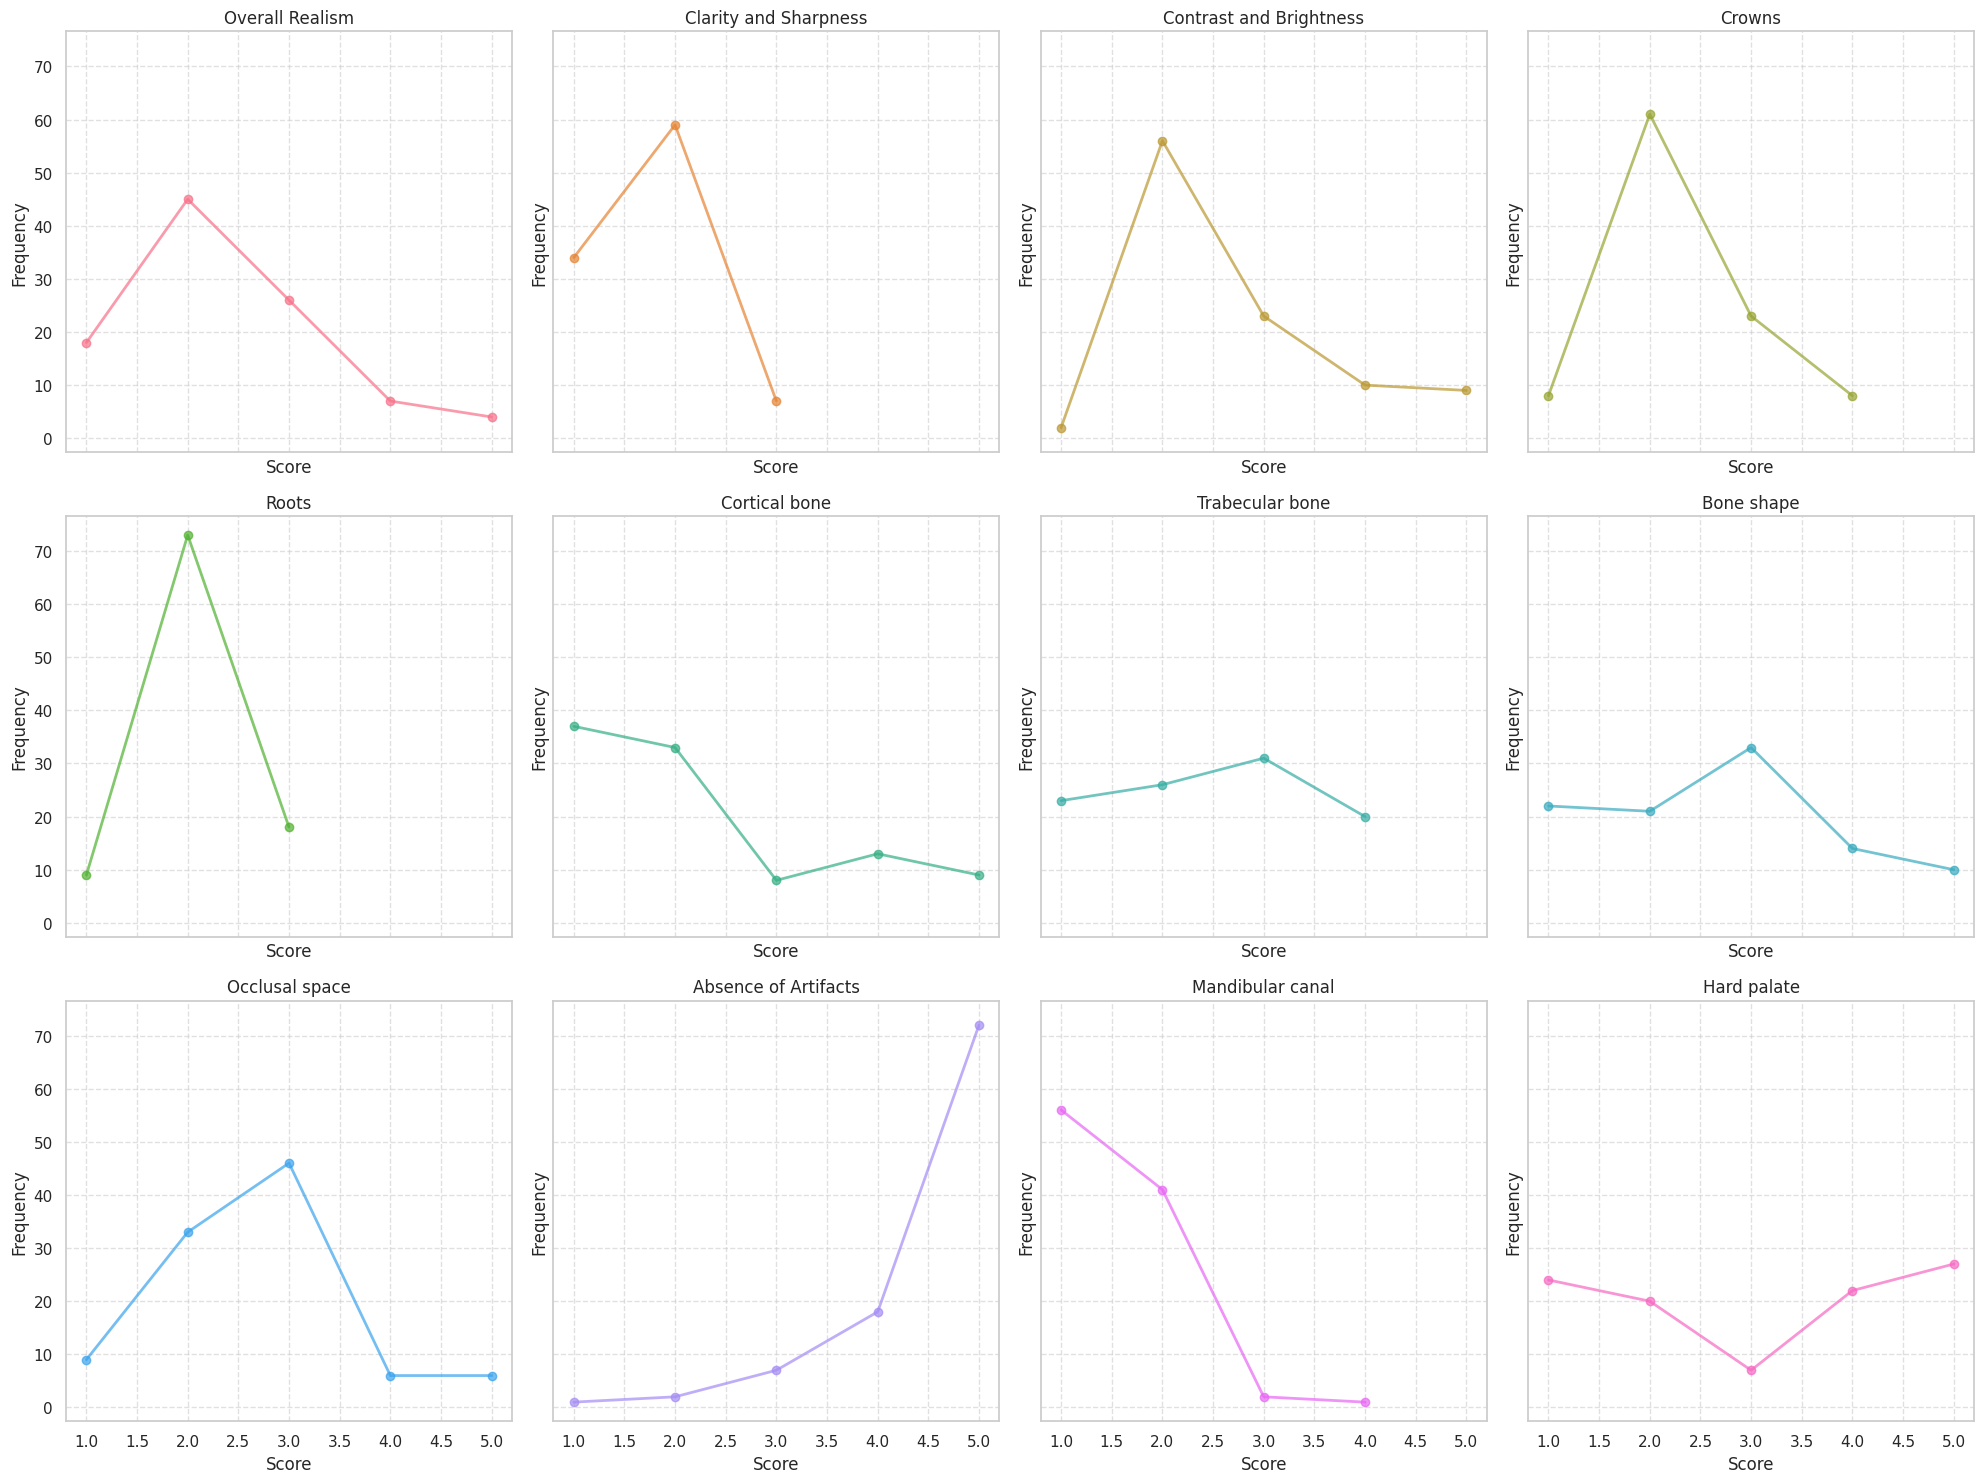

In [ ]:
def plot_score_frequencies_subplots(df, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 3) // 4  # 4 subplots per row

    fig, axs = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows), sharex=True, sharey=True)
    axs = axs.flatten()

    palette = sns.color_palette("husl", len(columns))

    for idx, column in enumerate(columns):
        score_counts = df[column].value_counts().sort_index()

        axs[idx].plot(score_counts.index, score_counts.values,
                      label=column,
                      color=palette[idx],
                      marker='o',
                      alpha=0.7,
                      linewidth=2)

        axs[idx].set_title(column, fontsize=12)
        axs[idx].set_xlabel('Score')
        axs[idx].set_ylabel('Frequency')
        axs[idx].grid(True, linestyle='--', alpha=0.6)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# Call the function to generate subplots
plot_score_frequencies_subplots(data, columns)


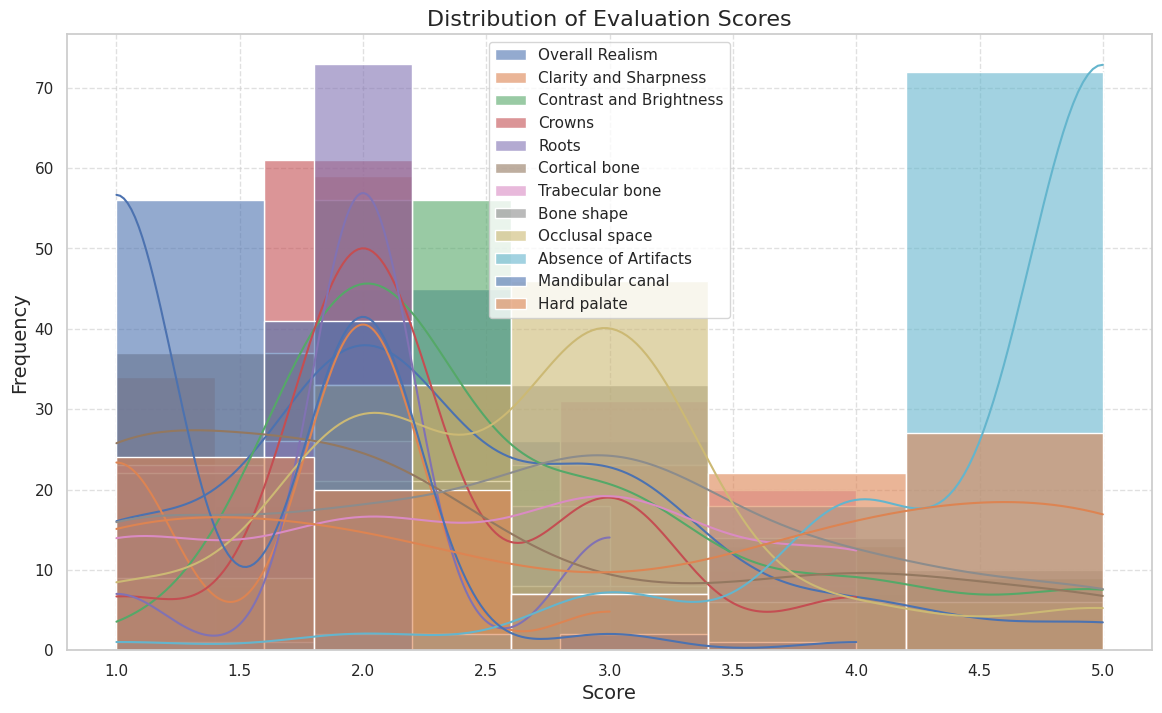

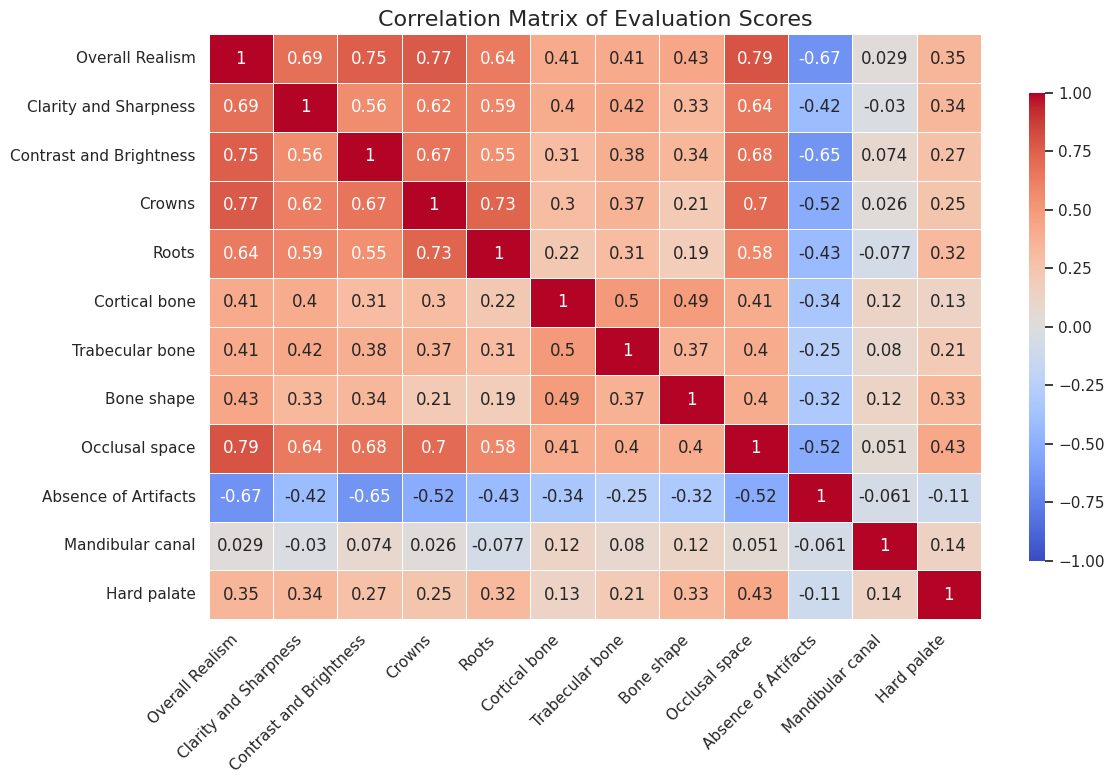

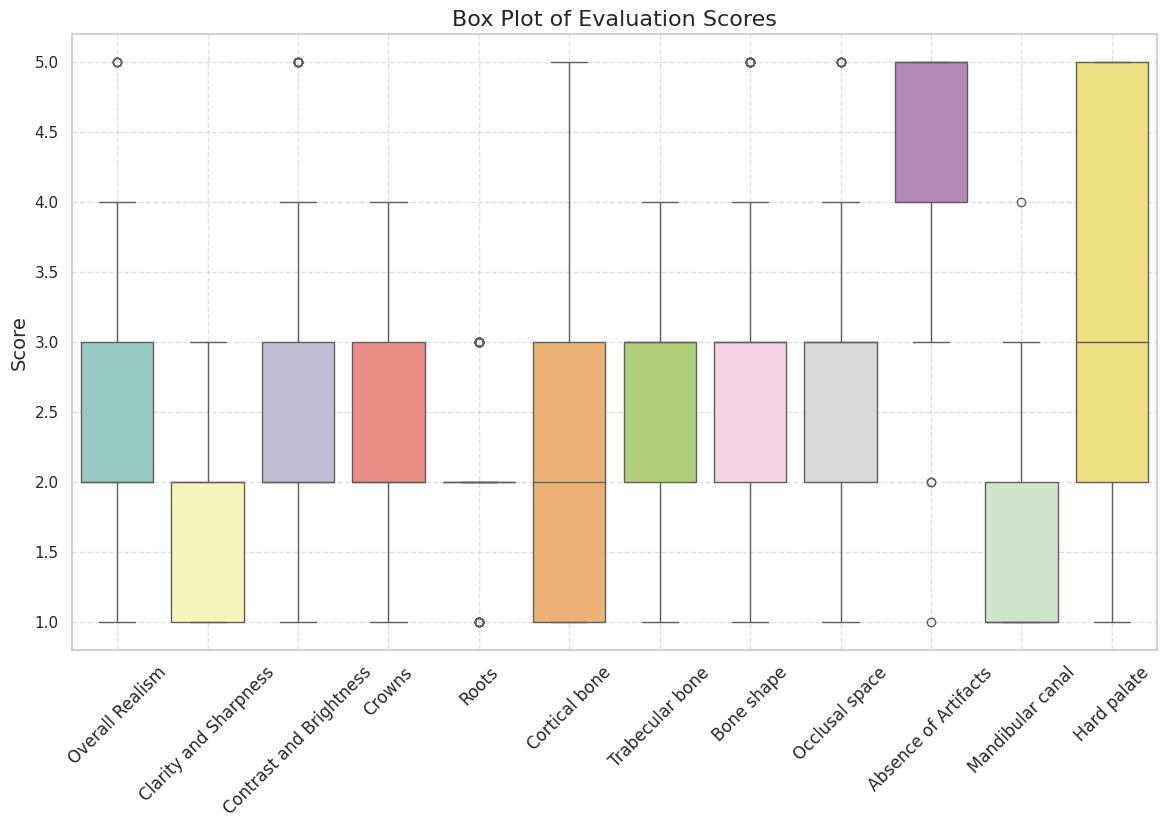

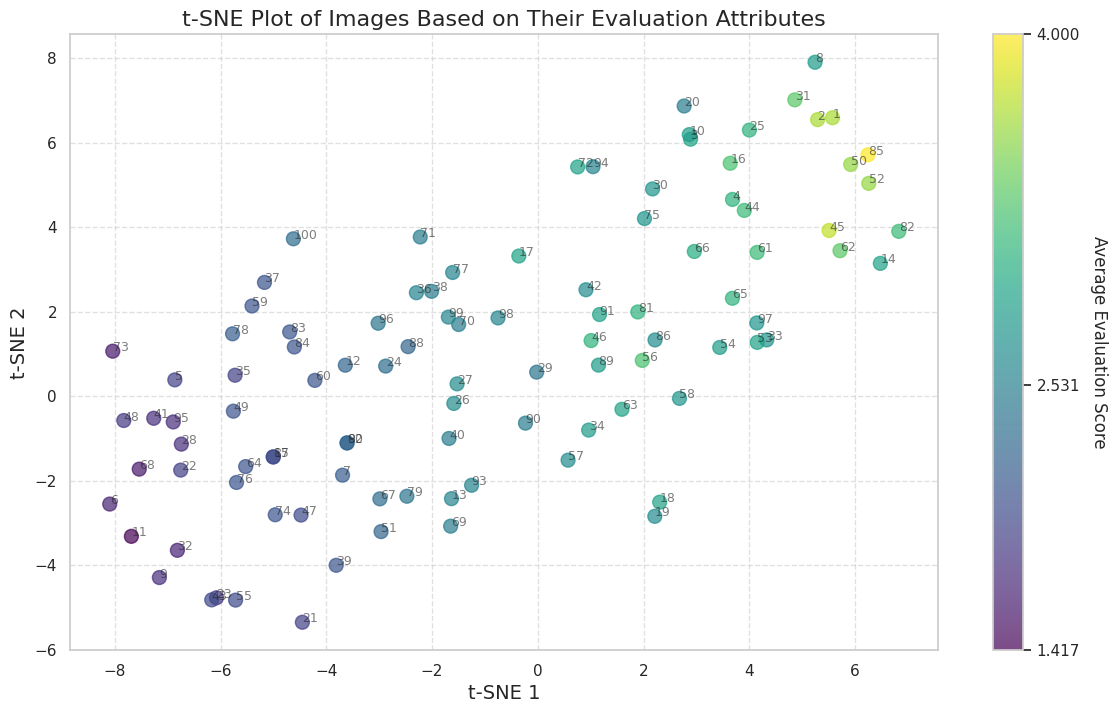

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Improved Plot 1: Distribution of Scores
def plot_distribution(df, columns):
    plt.figure(figsize=(14, 8))
    for column in columns:
        sns.histplot(df[column], kde=True, label=column, bins=5, alpha=0.6)
    plt.legend()
    plt.title('Distribution of Evaluation Scores', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Improved Plot 2: Correlation Heatmap
def plot_correlation_matrix(df, columns):
    plt.figure(figsize=(12, 8))
    corr_matrix = df[columns].corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
                vmin=-1, vmax=1, center=0, linewidths=0.5,
                cbar_kws={"shrink": 0.8, "aspect": 30})

    plt.title('Correlation Matrix of Evaluation Scores', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Improved Plot 3: Box Plot for Detailed Insights
def plot_boxplot(df, columns):
    plt.figure(figsize=(14, 8))

    sns.boxplot(data=df[columns], palette='Set3')
    plt.xticks(rotation=45, fontsize=12)
    plt.title('Box Plot of Evaluation Scores', fontsize=16)
    plt.ylabel('Score', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Improved Plot 4: t-SNE Plot for Image Clustering with Evaluation Scores
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Calculate average score per image
    df['average_score'] = df[columns].mean(axis=1)

    # Plot t-SNE results with color-coded average scores
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=df['average_score'], cmap='viridis', s=100, alpha=0.7)

    # Annotate points with image file numbers
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, alpha=0.6)

    # Add a color bar for the evaluation scores
    cbar = plt.colorbar(scatter)
    cbar.set_label('Average Evaluation Score', rotation=270, labelpad=20)
    cbar.set_ticks([df['average_score'].min(), df['average_score'].mean(), df['average_score'].max()])

    plt.title('t-SNE Plot of Images Based on Their Evaluation Attributes', fontsize=16)
    plt.xlabel('t-SNE 1', fontsize=14)
    plt.ylabel('t-SNE 2', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Absence of Artifacts', 'Mandibular canal', 'Hard palate']

# Calling the functions to generate the improved plots
plot_distribution(data, columns)
plot_correlation_matrix(data, columns)
plot_boxplot(data, columns)
plot_tsne(data, columns)


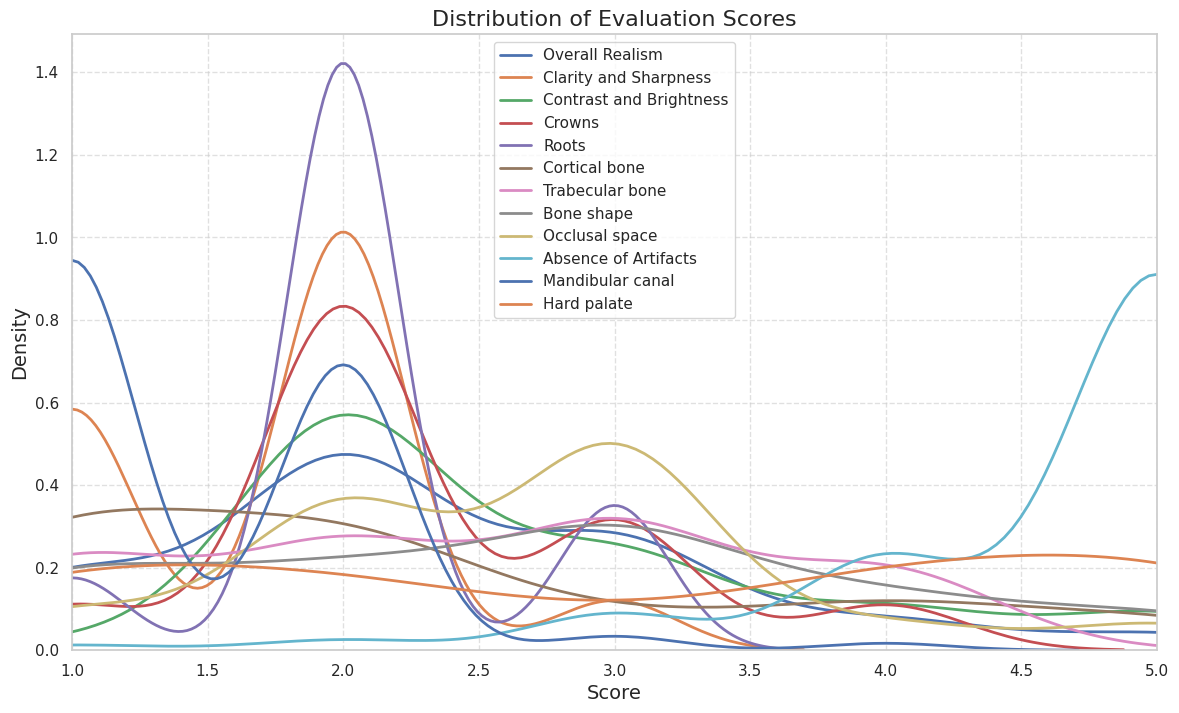

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Improved Plot 1: Distribution of Scores with Only Curves
def plot_distribution_curves_only(df, columns):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()  # Get the current axis

    for column in columns:
        # Plot the distribution curve using sns.kdeplot
        sns.kdeplot(df[column], label=column, linewidth=2)

    plt.legend()
    plt.title('Distribution of Evaluation Scores', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(1, 5)  # Set x-limits to match the score range
    plt.ylim(0)  # Set y-limits to start from 0
    plt.show()

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Absence of Artifacts', 'Mandibular canal', 'Hard palate']

# Calling the function to generate the plot with only curves
plot_distribution_curves_only(data, columns)


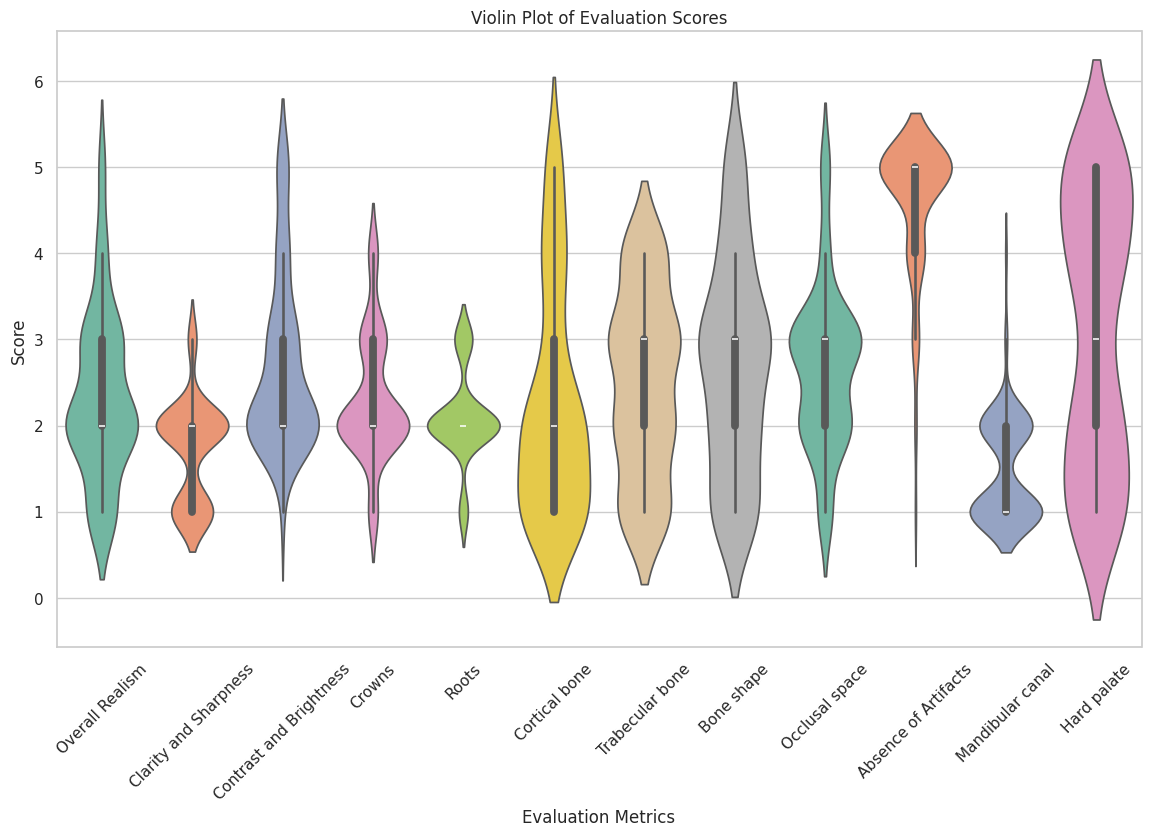

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Absence of Artifacts', 'Mandibular canal', 'Hard palate']

# Violin Plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=data[columns], palette='Set2')
plt.title('Violin Plot of Evaluation Scores')
plt.ylabel('Score')
plt.xlabel('Evaluation Metrics')
plt.xticks(rotation=45)

# Save the plot as a high-quality PDF
plt.savefig('violin_plot_evaluation_scores.pdf', format='pdf', dpi=300, bbox_inches='tight')

plt.show()


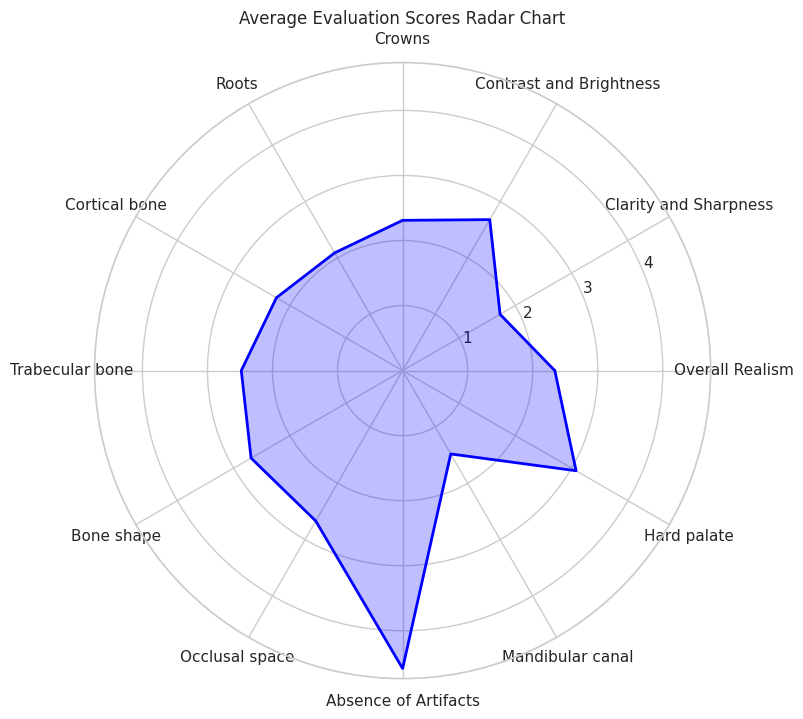

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Absence of Artifacts', 'Mandibular canal', 'Hard palate']

def plot_radar_chart(df, title):
    # Number of variables
    num_vars = len(columns)

    # Create a 2D array of the values
    values = df[columns].mean().values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circle

    # Angles for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)

    # Add labels
    plt.xticks(angles[:-1], columns)
    ax.set_title(title)

    # Save the plot as a high-quality PDF
    plt.savefig('radar_chart_average_evaluation_scores.pdf', format='pdf', dpi=300, bbox_inches='tight')

    plt.show()

# Call the radar chart function
plot_radar_chart(data, 'Average Evaluation Scores Radar Chart')


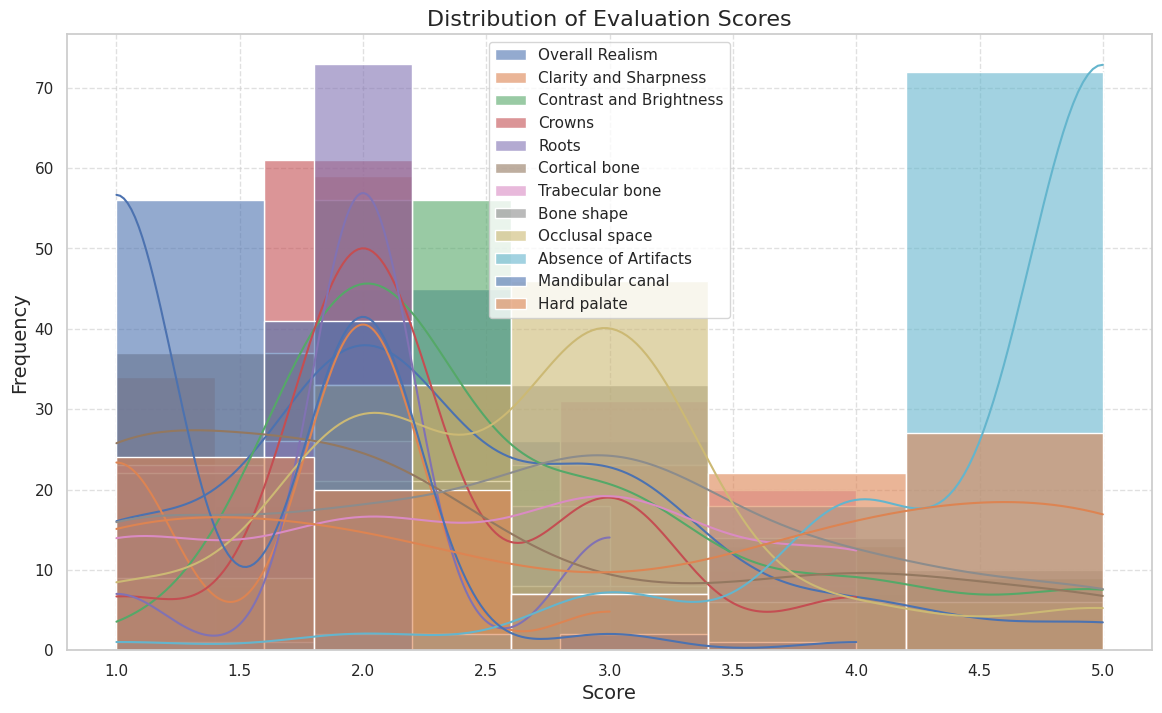

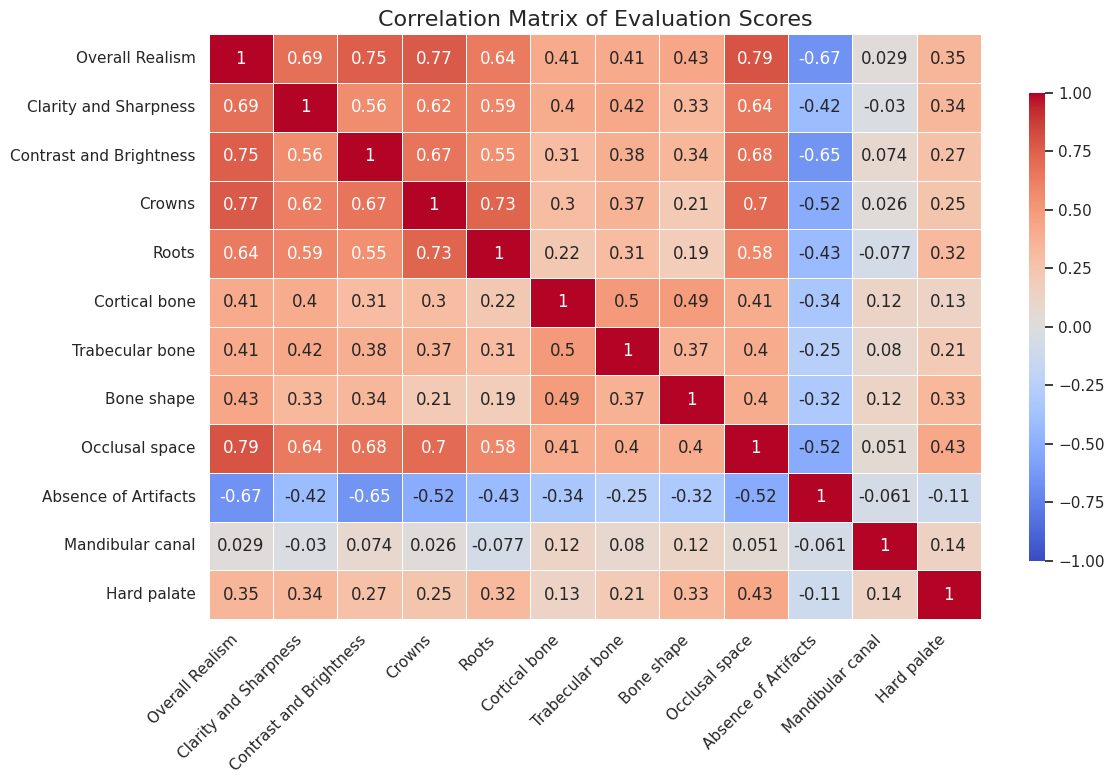

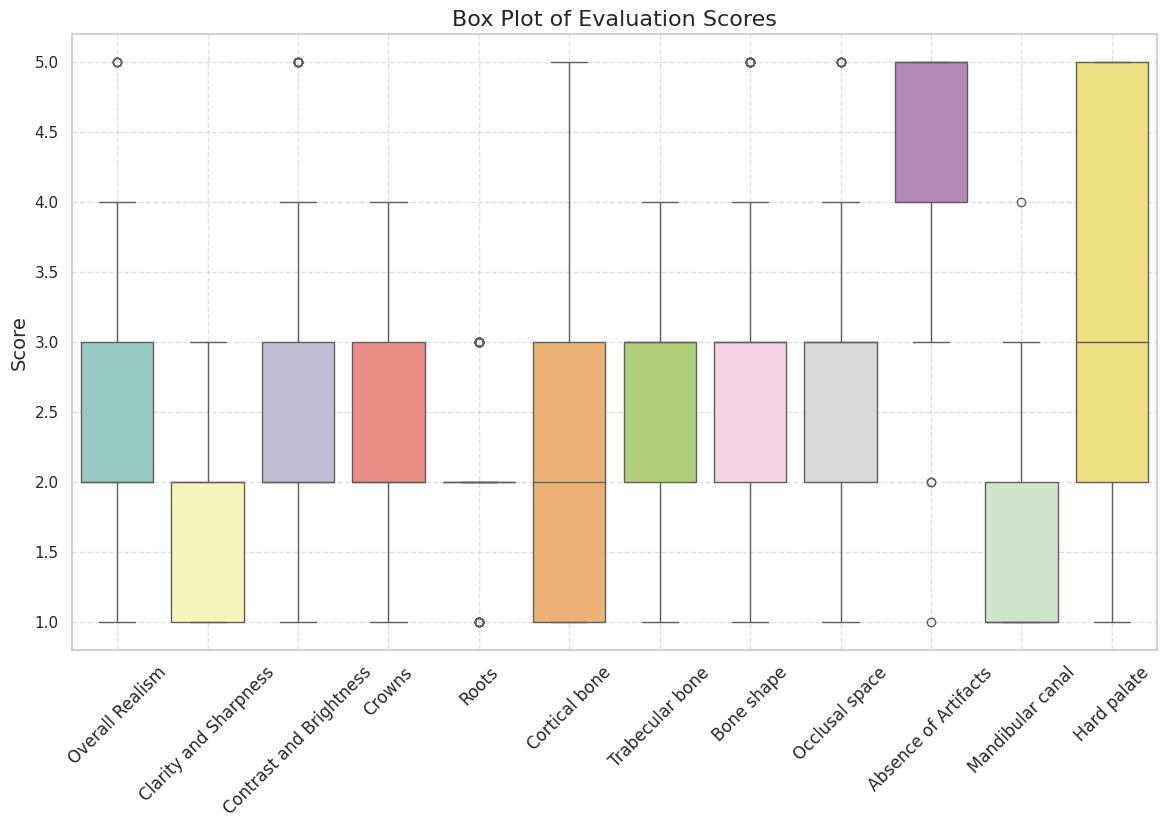

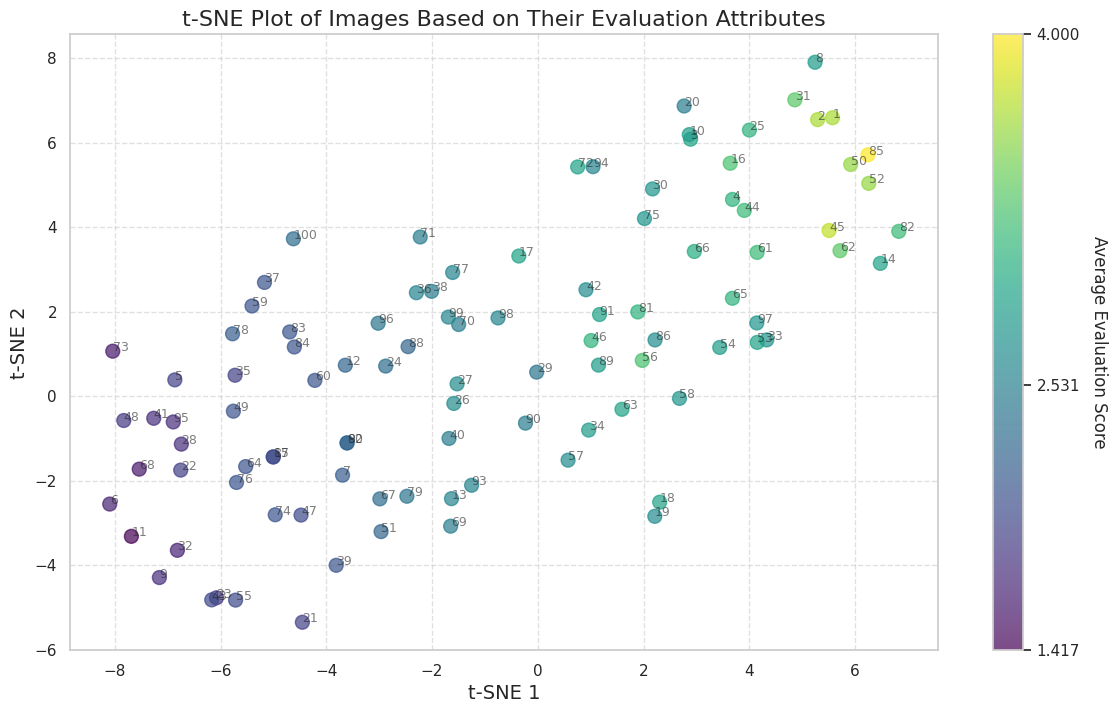

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Improved Plot 1: Distribution of Scores
def plot_distribution(df, columns):
    plt.figure(figsize=(14, 8))
    for column in columns:
        sns.histplot(df[column], kde=True, label=column, bins=5, alpha=0.6)
    plt.legend()
    plt.title('Distribution of Evaluation Scores', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Improved Plot 2: Correlation Heatmap
def plot_correlation_matrix(df, columns):
    plt.figure(figsize=(12, 8))
    corr_matrix = df[columns].corr()

    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
                vmin=-1, vmax=1, center=0, linewidths=0.5,
                cbar_kws={"shrink": 0.8, "aspect": 30})

    plt.title('Correlation Matrix of Evaluation Scores', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Improved Plot 3: Box Plot for Detailed Insights
def plot_boxplot(df, columns):
    plt.figure(figsize=(14, 8))

    sns.boxplot(data=df[columns], palette='Set3')
    plt.xticks(rotation=45, fontsize=12)
    plt.title('Box Plot of Evaluation Scores', fontsize=16)
    plt.ylabel('Score', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Improved Plot 4: t-SNE Plot for Image Clustering with Evaluation Scores
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Calculate average score per image
    df['average_score'] = df[columns].mean(axis=1)

    # Plot t-SNE results with color-coded average scores
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=df['average_score'], cmap='viridis', s=100, alpha=0.7)

    # Annotate points with image file numbers
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, alpha=0.6)

    # Add a color bar for the evaluation scores
    cbar = plt.colorbar(scatter)
    cbar.set_label('Average Evaluation Score', rotation=270, labelpad=20)
    cbar.set_ticks([df['average_score'].min(), df['average_score'].mean(), df['average_score'].max()])

    plt.title('t-SNE Plot of Images Based on Their Evaluation Attributes', fontsize=16)
    plt.xlabel('t-SNE 1', fontsize=14)
    plt.ylabel('t-SNE 2', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Interactive t-SNE Plot
def interactive_tsne_plot(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Create a new DataFrame for Plotly
    tsne_df = pd.DataFrame(tsne_results, columns=['tsne_1', 'tsne_2'])
    tsne_df['img_file'] = df['img_file']
    tsne_df['average_score'] = df[columns].mean(axis=1)

    # Create the interactive scatter plot
    fig = px.scatter(tsne_df, x='tsne_1', y='tsne_2',
                     hover_name='img_file',
                     color='average_score',
                     color_continuous_scale='Viridis',
                     title='Interactive t-SNE Plot of Images Based on Their Evaluation Attributes')

    # Update hover information
    fig.update_traces(hovertemplate='<br>'.join([
        'Image: %{hovertext}',
        'Average Evaluation Score: %{customdata[0]:.2f}',
    ]), customdata=tsne_df[['average_score']].values)

    # Show the plot
    fig.show()

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Absence of Artifacts', 'Mandibular canal', 'Hard palate']

# Calling the functions to generate the improved plots
plot_distribution(data, columns)
plot_correlation_matrix(data, columns)
plot_boxplot(data, columns)
plot_tsne(data, columns)

# Call the interactive t-SNE plot
interactive_tsne_plot(data, columns)


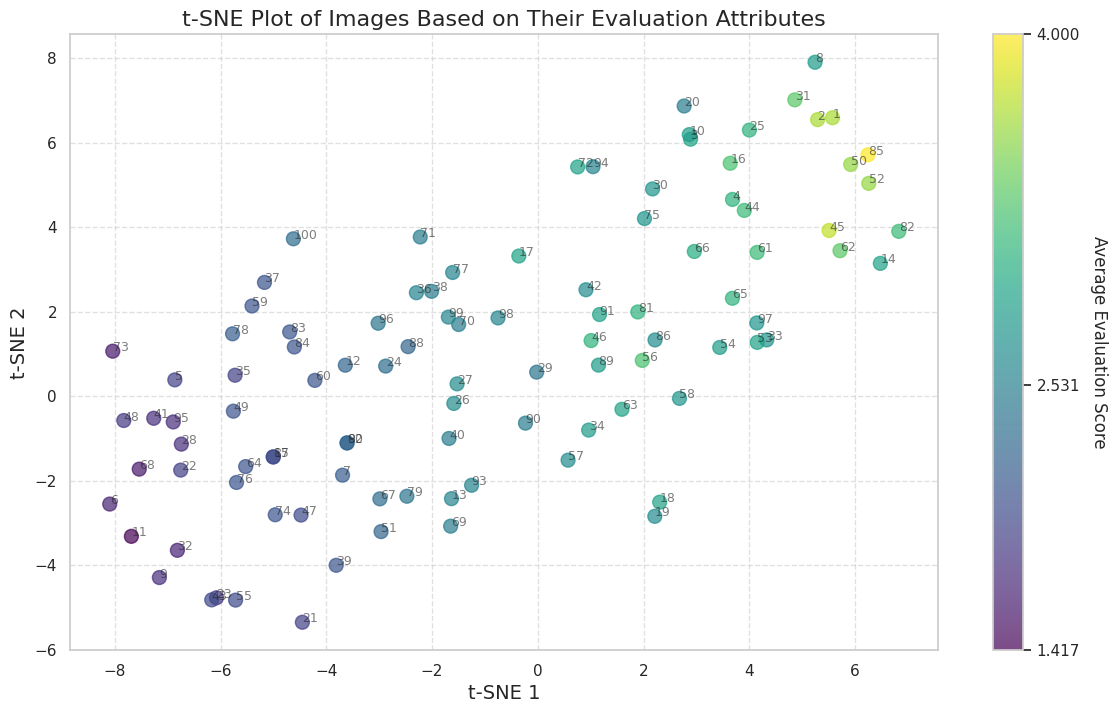

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
data = pd.read_excel('results.xlsx')

# Columns for evaluation metrics
columns = ['Overall Realism', 'Clarity and Sharpness', 'Contrast and Brightness',
           'Crowns', 'Roots', 'Cortical bone', 'Trabecular bone', 'Bone shape',
           'Occlusal space', 'Absence of Artifacts', 'Mandibular canal', 'Hard palate']

# Improved Plot 1: Distribution of Scores
def plot_distribution(df, columns):
    plt.figure(figsize=(14, 8))
    for column in columns:
        sns.histplot(df[column], kde=True, label=column, bins=5, alpha=0.6)
    plt.legend()
    plt.title('Distribution of Evaluation Scores', fontsize=16)
    plt.xlabel('Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig('distribution_of_evaluation_scores.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
    plt.close()  # Close the figure

# Improved Plot 2: Correlation Heatmap
def plot_correlation_matrix(df, columns):
    plt.figure(figsize=(12, 8))
    corr_matrix = df[columns].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',
                vmin=-1, vmax=1, center=0, linewidths=0.5,
                cbar_kws={"shrink": 0.8, "aspect": 30})

    plt.title('Correlation Matrix of Evaluation Scores', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('correlation_matrix_of_evaluation_scores.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
    plt.close()  # Close the figure

# Improved Plot 3: Box Plot for Detailed Insights
def plot_boxplot(df, columns):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[columns], palette='Set3')
    plt.xticks(rotation=45, fontsize=12)
    plt.title('Box Plot of Evaluation Scores', fontsize=16)
    plt.ylabel('Score', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig('box_plot_of_evaluation_scores.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
    plt.close()  # Close the figure

# Improved Plot 4: t-SNE Plot for Image Clustering with Evaluation Scores
def plot_tsne(df, columns):
    # Standardize the data
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns])

    # Perform t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(standardized_data)

    # Calculate average score per image
    df['average_score'] = df[columns].mean(axis=1)

    # Plot t-SNE results with color-coded average scores
    plt.figure(figsize=(14, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1],
                          c=df['average_score'], cmap='viridis', s=100, alpha=0.7)

    # Annotate points with image file numbers
    for i, img_file in enumerate(df['img_file']):
        plt.annotate(img_file.split('_')[1], (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, alpha=0.6)

    # Add a color bar for the evaluation scores
    cbar = plt.colorbar(scatter)
    cbar.set_label('Average Evaluation Score', rotation=270, labelpad=20)
    cbar.set_ticks([df['average_score'].min(), df['average_score'].mean(), df['average_score'].max()])

    plt.title('t-SNE Plot of Images Based on Their Evaluation Attributes', fontsize=16)
    plt.xlabel('t-SNE 1', fontsize=14)
    plt.ylabel('t-SNE 2', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig('tsne_plot_of_images_based_on_evaluation_attributes.pdf', bbox_inches='tight', dpi=300)  # Save as PDF
    plt.show()
    plt.close()  # Close the figure

# Calling the functions to generate the improved plots
plot_distribution(data, columns)
plot_correlation_matrix(data, columns)
plot_boxplot(data, columns)
plot_tsne(data, columns)


## Comment 2 - Also the violin plot would best be changed into a regular boxplot (unless you can change it so that it does not go beyond the actual range of scores i.e. from 1 to 5, because now it has tails going below 0 and above 6 even)

Response - Updated with the box plots with colored and b/w both. I think colored is more informative and hence can be inlcuded in the paper

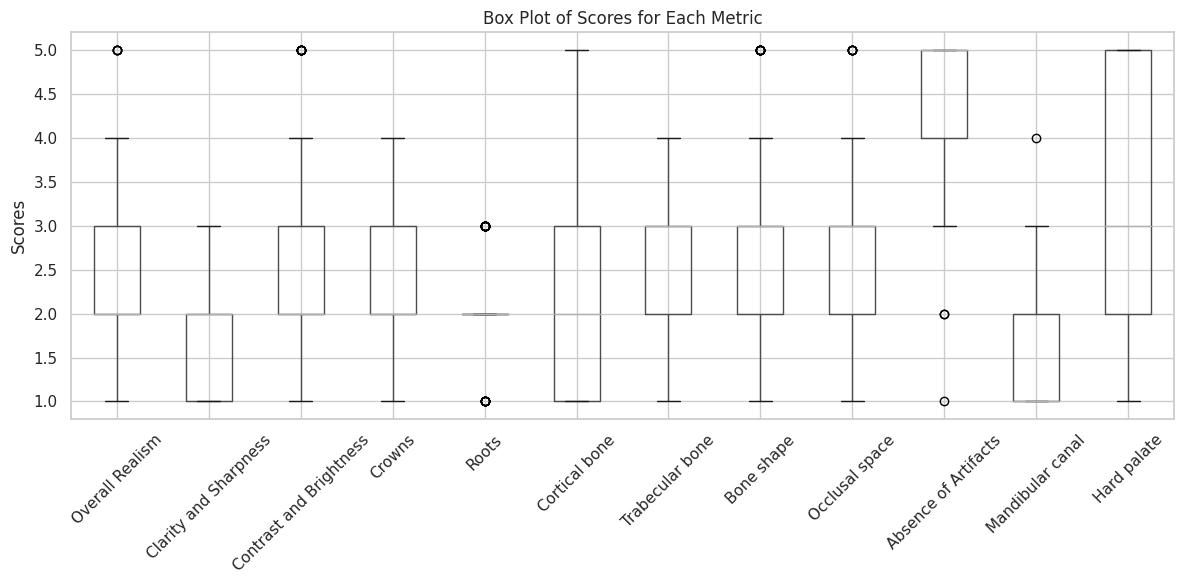

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
file_path = 'results.xlsx'  # Replace with the actual path
df = pd.read_excel(file_path)

# Exclude the 'img_file' column as it is not numerical
data_for_boxplot = df.drop(columns=['img_file'])

# Create a box plot for the data
plt.figure(figsize=(12, 6))
data_for_boxplot.boxplot()

# Set the labels and title
plt.title('Box Plot of Scores for Each Metric')
plt.ylabel('Scores')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Load the Excel file into a DataFrame
file_path = 'results.xlsx'  # Replace with the actual path
df = pd.read_excel(file_path)

# Exclude the 'img_file' column as it is not numerical
data_for_boxplot = df.drop(columns=['img_file'])

# Melt the DataFrame to long format for Plotly
data_long = data_for_boxplot.melt(var_name='Metrics', value_name='Scores')

# Create a box plot using Plotly
fig = px.box(data_long, x='Metrics', y='Scores', color='Metrics',
             color_discrete_sequence=px.colors.qualitative.Set2,  # Use a qualitative color palette
             title='Box Plot of Scores for Each Metric')

# Show the plot
fig.show()


## Comment 3 - One other thing that we should consider is that the images that were scored by Bruna are from four different models. They are organized very basically because I did not see a need to randomize them. So image 1, 5, 9, etc are from Model 1. Image 2, 6, 10 etc from Model 2. And so on. So my suggestion would be that we first compare the scores per model - to see which one performed best - and then provide the full analysis of the scores (edit:of the best model only) in the paper using the graphs you have already included

Response - Models 1 and 2 we pick on the basis of the results and agreed to display their results being the difference is M1 was fed with noise images and M2 was fed with denoised images

In [ ]:
!rm -rf sample_data

In [ ]:
import pandas as pd

# Reading the Excel file and displaying the header
file_path = '/content/results.xlsx'
excel_data = pd.read_excel(file_path)

# Display the header of the Excel file
excel_data.head()


img_file  Overall Realism  Clarity and Sharpness  Contrast and Brightness  \
0  image_1                5                      2                        5   
1  image_2                5                      2                        5   
2  image_3                3                      2                        5   
3  image_4                3                      2                        3   
4  image_5                2                      1                        2   

   Crowns  Roots  Cortical bone  Trabecular bone  Bone shape  Occlusal space  \
0       4      3              2                4           4               5   
1       4      3              2                4           5               5   
2       3      3              2                3           3               3   
3       3      3              2                3           4               3   
4       2      2              1                3           1               2   

   Absence of Artifacts  Mandibular canal  Hard palate  
0                     3                 2            5  
1                     4                 1            4  
2                     4                 2            2  
3                     4                 2            5  
4                     5                 1            1

In [ ]:
import pandas as pd

def prepare_model_dataframes(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Prepare four dataframes for each model
    model_1_df = df.iloc[::4]  # Model 1 (images 1, 5, 9...)
    model_2_df = df.iloc[1::4]  # Model 2 (images 2, 6, 10...)
    model_3_df = df.iloc[2::4]  # Model 3 (images 3, 7, 11...)
    model_4_df = df.iloc[3::4]  # Model 4 (images 4, 8, 12...)

    return model_1_df, model_2_df, model_3_df, model_4_df

# Example usage:
file_path = 'results.xlsx'  # Provide the correct path to your file
model_1, model_2, model_3, model_4 = prepare_model_dataframes(file_path)




In [ ]:
# Display the first few rows of each dataframe for verification
print("Model 1 Dataframe:")
print(model_1.head())


Model 1 Dataframe:
    img_file  Overall Realism  Clarity and Sharpness  Contrast and Brightness  \
0    image_1                5                      2                        5   
4    image_5                2                      1                        2   
8    image_9                1                      1                        2   
12  image_13                2                      1                        2   
16  image_17                3                      2                        5   

    Crowns  Roots  Cortical bone  Trabecular bone  Bone shape  Occlusal space  \
0        4      3              2                4           4               5   
4        2      2              1                3           1               2   
8        1      1              1                3           3               1   
12       2      2              2                3           3               2   
16       2      2              2                3           2               3   

    Abs

In [ ]:
print("\nModel 2 Dataframe:")
print(model_2.head())



Model 2 Dataframe:
    img_file  Overall Realism  Clarity and Sharpness  Contrast and Brightness  \
1    image_2                5                      2                        5   
5    image_6                2                      1                        2   
9   image_10                3                      2                        5   
13  image_14                4                      2                        4   
17  image_18                3                      2                        3   

    Crowns  Roots  Cortical bone  Trabecular bone  Bone shape  Occlusal space  \
1        4      3              2                4           5               5   
5        1      1              1                1           1               3   
9        3      3              1                3           3               3   
13       2      2              5                3           4               4   
17       2      2              2                2           5               3   

    Ab

In [ ]:
print("\nModel 3 Dataframe:")
print(model_3.head())



Model 3 Dataframe:
    img_file  Overall Realism  Clarity and Sharpness  Contrast and Brightness  \
2    image_3                3                      2                        5   
6    image_7                1                      1                        2   
10  image_11                1                      1                        1   
14  image_15                2                      1                        2   
18  image_19                2                      2                        3   

    Crowns  Roots  Cortical bone  Trabecular bone  Bone shape  Occlusal space  \
2        3      3              2                3           3               3   
6        2      2              1                1           3               2   
10       1      1              1                1           1               1   
14       2      2              1                1           3               2   
18       2      2              1                2           3               3   

    Ab

In [ ]:
print("\nModel 4 Dataframe:")
print(model_4.head())


Model 4 Dataframe:
    img_file  Overall Realism  Clarity and Sharpness  Contrast and Brightness  \
3    image_4                3                      2                        3   
7    image_8                5                      2                        5   
11  image_12                2                      2                        2   
15  image_16                3                      2                        5   
19  image_20                3                      2                        5   

    Crowns  Roots  Cortical bone  Trabecular bone  Bone shape  Occlusal space  \
3        3      3              2                3           4               3   
7        4      3              1                1           1               5   
11       2      2              2                1           3               3   
15       3      3              2                4           4               3   
19       3      2              2                2           2               3   

    Ab

The best-performing model is Model 2 with the following scores:
Overall Realism            2.72
Clarity and Sharpness      1.96
Contrast and Brightness    2.88
Crowns                     2.32
Roots                      2.20
Cortical bone              2.76
Trabecular bone            2.80
Bone shape                 3.16
Occlusal space             3.04
Absence of Artifacts       4.36
Mandibular canal           1.48
Hard palate                3.04
dtype: float64


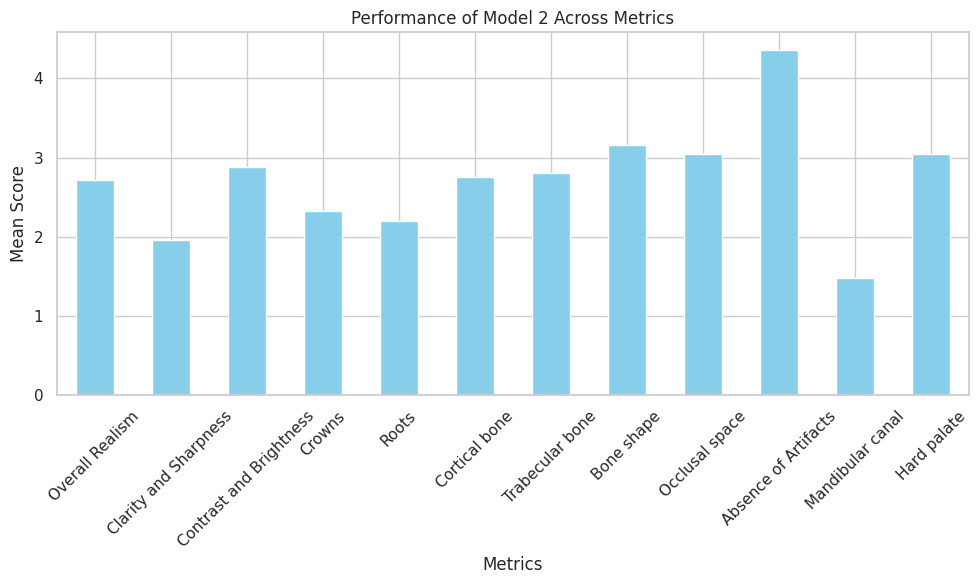

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def prepare_model_dataframes(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Prepare dataframes for each model
    model_1_df = df.iloc[::4]  # Model 1 (images 1, 5, 9...)
    model_2_df = df.iloc[1::4]  # Model 2 (images 2, 6, 10...)
    model_3_df = df.iloc[2::4]  # Model 3 (images 3, 7, 11...)
    model_4_df = df.iloc[3::4]  # Model 4 (images 4, 8, 12...)

    return model_1_df, model_2_df, model_3_df, model_4_df

def aggregate_scores(model_df):
    # Exclude the 'img_file' column and compute mean score across all metrics
    return model_df.drop(columns=['img_file']).mean()

def compare_models(models):
    # Compare models by their aggregate scores (mean scores across metrics)
    model_scores = {f'Model {i+1}': aggregate_scores(model) for i, model in enumerate(models)}

    # Find the model with the highest mean score across all metrics
    best_model = max(model_scores, key=lambda x: model_scores[x].mean())
    return best_model, model_scores[best_model]

def plot_model_performance(model_df, model_name):
    # Plot the performance of the best model across different metrics
    metrics = model_df.columns[1:]  # Exclude 'img_file'
    mean_scores = model_df[metrics].mean()

    # Create a bar plot for the metrics
    plt.figure(figsize=(10, 6))
    mean_scores.plot(kind='bar', color='skyblue')
    plt.title(f'Performance of {model_name} Across Metrics')
    plt.ylabel('Mean Score')
    plt.xlabel('Metrics')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main workflow
file_path = 'results.xlsx'  # Replace with the actual path of your file
model_1, model_2, model_3, model_4 = prepare_model_dataframes(file_path)

# List of all models
models = [model_1, model_2, model_3, model_4]

# Compare models and find the best one
best_model_name, best_model_scores = compare_models(models)

# Display the best model's mean scores across metrics
print(f"The best-performing model is {best_model_name} with the following scores:\n{best_model_scores}")

# Plot the performance of the best model by directly passing the corresponding dataframe
best_model_df = models[int(best_model_name.split()[-1]) - 1]
plot_model_performance(best_model_df, best_model_name)


The Model 2 has the following scores:
Overall Realism            2.72
Clarity and Sharpness      1.96
Contrast and Brightness    2.88
Crowns                     2.32
Roots                      2.20
Cortical bone              2.76
Trabecular bone            2.80
Bone shape                 3.16
Occlusal space             3.04
Absence of Artifacts       4.36
Mandibular canal           1.48
Hard palate                3.04
dtype: float64

The Model 1 has the following scores:
Overall Realism            2.44
Clarity and Sharpness      1.68
Contrast and Brightness    2.84
Crowns                     2.48
Roots                      2.00
Cortical bone              2.48
Trabecular bone            3.36
Bone shape                 2.48
Occlusal space             2.76
Absence of Artifacts       4.52
Mandibular canal           1.64
Hard palate                3.20
dtype: float64



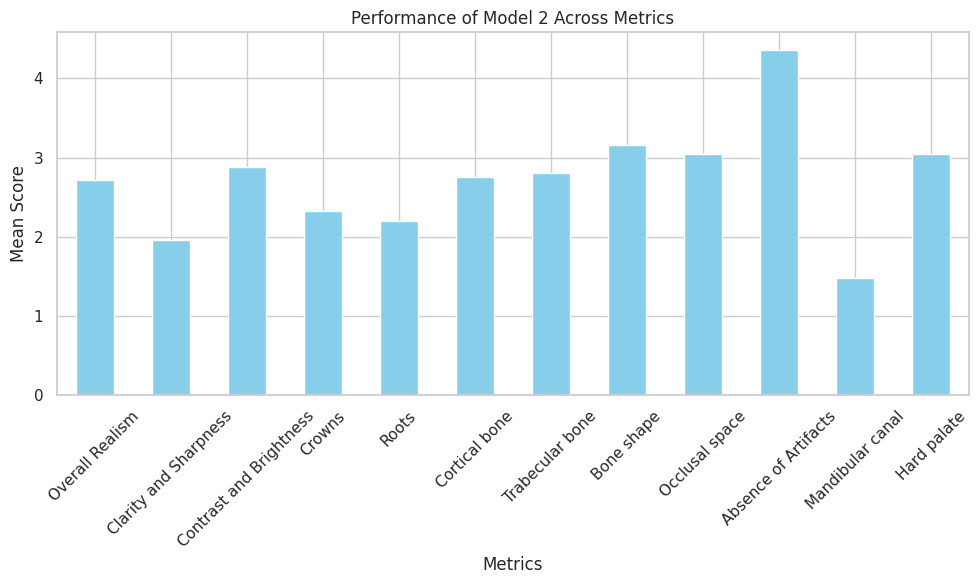

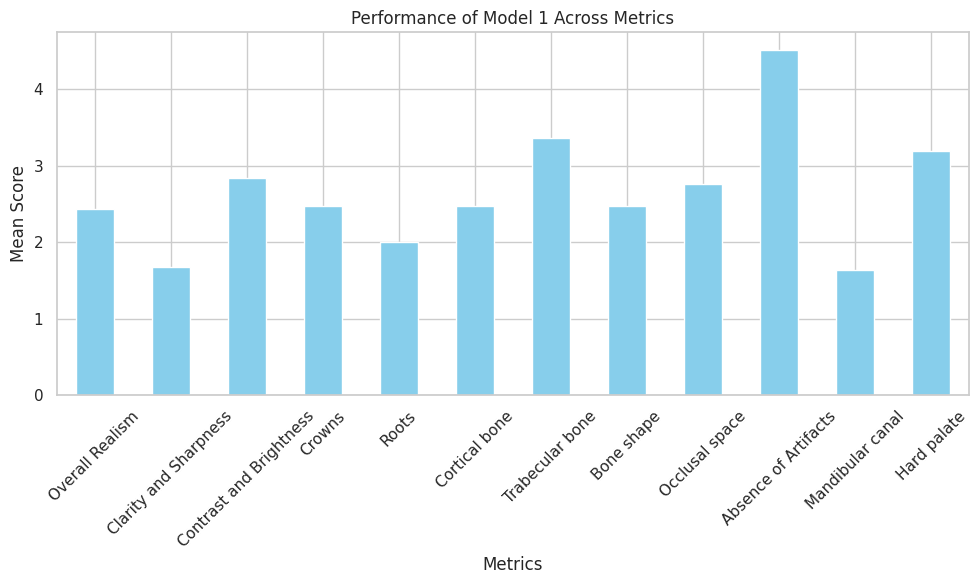

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def prepare_model_dataframes(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Prepare dataframes for each model
    model_1_df = df.iloc[::4]  # Model 1 (images 1, 5, 9...)
    model_2_df = df.iloc[1::4]  # Model 2 (images 2, 6, 10...)
    model_3_df = df.iloc[2::4]  # Model 3 (images 3, 7, 11...)
    model_4_df = df.iloc[3::4]  # Model 4 (images 4, 8, 12...)

    return model_1_df, model_2_df, model_3_df, model_4_df

def aggregate_scores(model_df):
    # Exclude the 'img_file' column and compute mean score across all metrics
    return model_df.drop(columns=['img_file']).mean()

def compare_models(models):
    # Compare models by their aggregate scores (mean scores across metrics)
    model_scores = {f'Model {i+1}': aggregate_scores(model) for i, model in enumerate(models)}

    # Sort models by their mean scores
    sorted_models = sorted(model_scores.items(), key=lambda x: x[1].mean(), reverse=True)

    # Get the two best models
    best_models = sorted_models[:2]
    return best_models

def plot_model_performance(model_df, model_name):
    # Plot the performance of the model across different metrics
    metrics = model_df.columns[1:]  # Exclude 'img_file'
    mean_scores = model_df[metrics].mean()

    # Create a bar plot for the metrics
    plt.figure(figsize=(10, 6))
    mean_scores.plot(kind='bar', color='skyblue')
    plt.title(f'Performance of {model_name} Across Metrics')
    plt.ylabel('Mean Score')
    plt.xlabel('Metrics')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main workflow
file_path = 'results.xlsx'  # Replace with the actual path of your file
model_1, model_2, model_3, model_4 = prepare_model_dataframes(file_path)

# List of all models
models = [model_1, model_2, model_3, model_4]

# Compare models and find the best two
best_models = compare_models(models)

# Display the best two models' mean scores across metrics
for model_name, scores in best_models:
    print(f"The {model_name} has the following scores:\n{scores}\n")

# Plot the performance of the best two models
for model_name, _ in best_models:
    model_df = models[int(model_name.split()[-1]) - 1]
    plot_model_performance(model_df, model_name)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def prepare_model_dataframes(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Prepare dataframes for each model
    model_1_df = df.iloc[::4]  # Model 1 (images 1, 5, 9...)
    model_2_df = df.iloc[1::4]  # Model 2 (images 2, 6, 10...)
    model_3_df = df.iloc[2::4]  # Model 3 (images 3, 7, 11...)
    model_4_df = df.iloc[3::4]  # Model 4 (images 4, 8, 12...)

    return model_1_df, model_2_df, model_3_df, model_4_df

def aggregate_scores(model_df):
    # Exclude the 'img_file' column and compute mean score across all metrics
    return model_df.drop(columns=['img_file']).mean()

def compare_all_models(models):
    # Compare models and create a DataFrame with average scores for each attribute
    model_comparison = pd.DataFrame()

    for i, model in enumerate(models, start=1):
        mean_scores = aggregate_scores(model)
        # Create a DataFrame for the model
        model_scores_df = pd.DataFrame(mean_scores).T
        model_scores_df['Model'] = f'Model {i}'
        model_comparison = pd.concat([model_comparison, model_scores_df], ignore_index=True)

    # Reorder columns to have 'Model' first
    model_comparison = model_comparison[['Model'] + [col for col in model_comparison.columns if col != 'Model']]

    # Set the index starting from 1
    model_comparison.index = range(1, len(model_comparison) + 1)
    return model_comparison

# Function to highlight max values in the DataFrame
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

# Main workflow
file_path = 'results.xlsx'  # Replace with the actual path of your file
model_1, model_2, model_3, model_4 = prepare_model_dataframes(file_path)

# List of all models
models = [model_1, model_2, model_3, model_4]

# Create a comparison table of average scores for each model
comparison_table = compare_all_models(models)

# Display the comparison table with highlighted max values
print("Comparison of Models:")
styled_table = comparison_table.style.apply(highlight_max, subset=comparison_table.columns[1:])
styled_table


Comparison of Models:


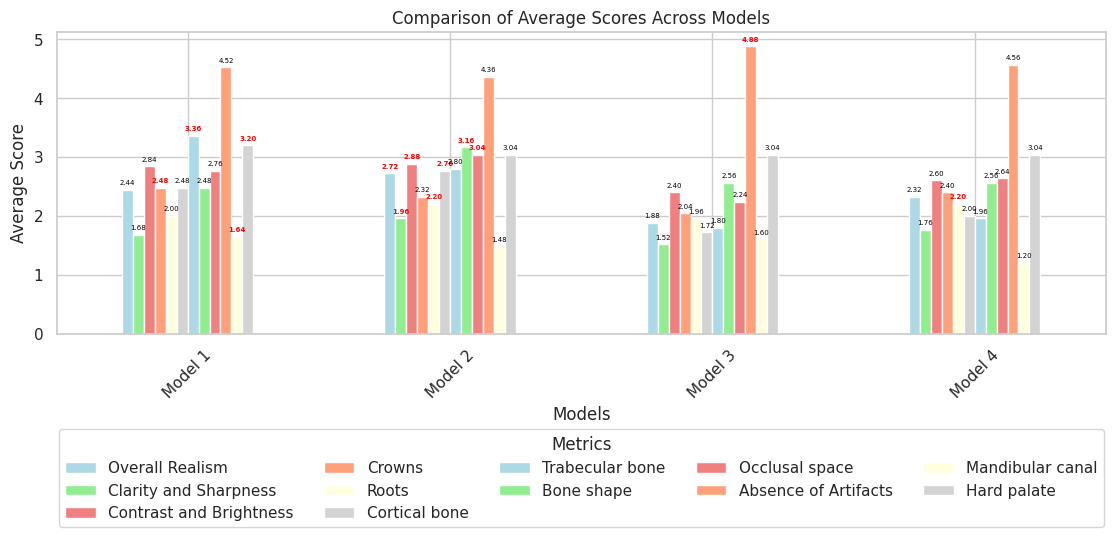

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to prepare model dataframes and calculate comparison table
def prepare_model_dataframes(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Prepare dataframes for each model
    model_1_df = df.iloc[::4]  # Model 1 (images 1, 5, 9...)
    model_2_df = df.iloc[1::4]  # Model 2 (images 2, 6, 10...)
    model_3_df = df.iloc[2::4]  # Model 3 (images 3, 7, 11...)
    model_4_df = df.iloc[3::4]  # Model 4 (images 4, 8, 12...)

    return model_1_df, model_2_df, model_3_df, model_4_df

def aggregate_scores(model_df):
    # Exclude the 'img_file' column and compute mean score across all metrics
    return model_df.drop(columns=['img_file']).mean()

def compare_all_models(models):
    # Compare models and create a DataFrame with average scores for each attribute
    model_comparison = pd.DataFrame()

    for i, model in enumerate(models, start=1):
        mean_scores = aggregate_scores(model)
        # Create a DataFrame for the model
        model_scores_df = pd.DataFrame(mean_scores).T
        model_scores_df['Model'] = f'Model {i}'
        model_comparison = pd.concat([model_comparison, model_scores_df], ignore_index=True)

    # Reorder columns to have 'Model' first
    model_comparison = model_comparison[['Model'] + [col for col in model_comparison.columns if col != 'Model']]

    # Set the index starting from 1
    model_comparison.index = range(1, len(model_comparison) + 1)
    return model_comparison

# Main workflow
file_path = 'results.xlsx'  # Replace with the actual path of your file
model_1, model_2, model_3, model_4 = prepare_model_dataframes(file_path)

# List of all models
models = [model_1, model_2, model_3, model_4]

# Create a comparison table of average scores for each model
comparison_table = compare_all_models(models)

# Optional: Plot the performance of all models
def plot_all_models_performance(comparison_table):
    metrics = comparison_table.columns[1:]  # Exclude 'Model'

    # Create the bar plot
    ax = comparison_table.set_index('Model')[metrics].plot(
        kind='bar',
        figsize=(12, 6),
        color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightyellow', 'lightgrey']
    )

    # Set the titles and labels
    plt.title('Comparison of Average Scores Across Models')
    plt.ylabel('Average Score')
    plt.xlabel('Models')
    plt.xticks(rotation=45)

    # Get maximum values for each metric
    max_values = comparison_table[metrics].max()

    # Annotate y-values on top of bars with bold font, highlight max values for each metric
    for i, metric in enumerate(metrics):
        max_height = max_values[metric]
        for bar in ax.containers[i]:  # Iterate through each bar for the metric
            height = bar.get_height()
            is_max = height == max_height

            # Annotate only the max value for each metric
            if is_max:
                ax.annotate(f'{height:.2f}',  # Format the height value to two decimal places
                            xy=(bar.get_x() + bar.get_width() / 2, height),  # Position above the bar
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom',
                            fontsize=5,  # Set the font size for the annotation
                            fontweight='bold',  # Make the annotation bold
                            color='red')  # Highlight max values in red
            else:
                ax.annotate(f'{height:.2f}',  # Format the height value to two decimal places
                            xy=(bar.get_x() + bar.get_width() / 2, height),  # Position above the bar
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom',
                            fontsize=5,  # Set the font size for the annotation
                            fontweight='normal',  # Keep normal weight for others
                            color='black')  # Keep others in black

    # Place legend at the bottom in multi-line manner
    num_columns = 5  # Specify the number of columns for the legend
    plt.legend(title='Metrics', bbox_to_anchor=(0.5, -0.29), loc='upper center', ncol=num_columns)

    # Adjust layout to fit everything
    plt.tight_layout()

    # Save the plot as a PDF file
    plt.savefig('model_performance_comparison.pdf')

    # Show the plot
    plt.show()

# Plot the performance comparison of all models
plot_all_models_performance(comparison_table)



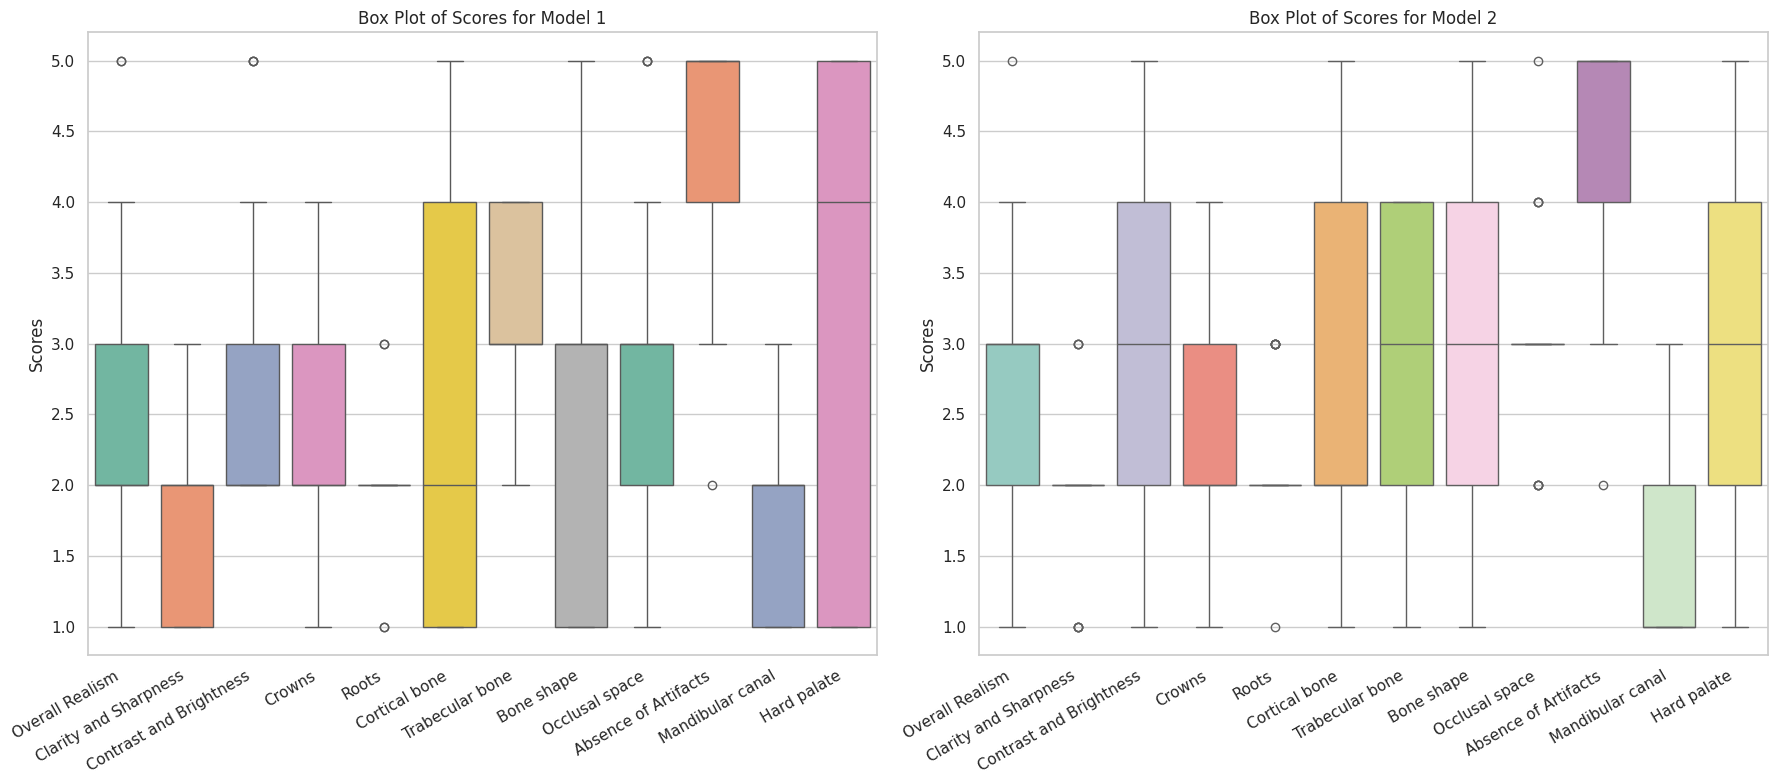

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to prepare model dataframes and calculate comparison table
def prepare_model_dataframes(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Prepare dataframes for each model
    model_1_df = df.iloc[::4]  # Model 1 (images 1, 5, 9...)
    model_2_df = df.iloc[1::4]  # Model 2 (images 2, 6, 10...)

    return model_1_df, model_2_df

def plot_model_boxplots(model_1, model_2):
    # Exclude the 'img_file' column
    model_1_data = model_1.drop(columns=['img_file'])
    model_2_data = model_2.drop(columns=['img_file'])

    # Create a wider figure for both boxplots
    plt.figure(figsize=(18, 8))  # Increased width for better label spacing

    # Create two subplots for each model
    plt.subplot(1, 2, 1)  # First subplot for Model 1
    sns.boxplot(data=model_1_data, palette='Set2')  # Use a colorful palette for Model 1
    plt.title('Box Plot of Scores for Model 1')
    plt.ylabel('Scores')
    plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels and align them for better readability

    plt.subplot(1, 2, 2)  # Second subplot for Model 2
    sns.boxplot(data=model_2_data, palette='Set3')  # Use a different colorful palette for Model 2
    plt.title('Box Plot of Scores for Model 2')
    plt.ylabel('Scores')
    plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels and align them for better readability

    # Adjust layout and save as a PDF
    plt.tight_layout()
    plt.savefig('models_boxplots_comparison.pdf')

    # Show the plots
    plt.show()

# Main workflow
file_path = 'results.xlsx'  # Replace with the actual path of your file
model_1, model_2 = prepare_model_dataframes(file_path)

# Plot box plots for both models and save as PDF
plot_model_boxplots(model_1, model_2)


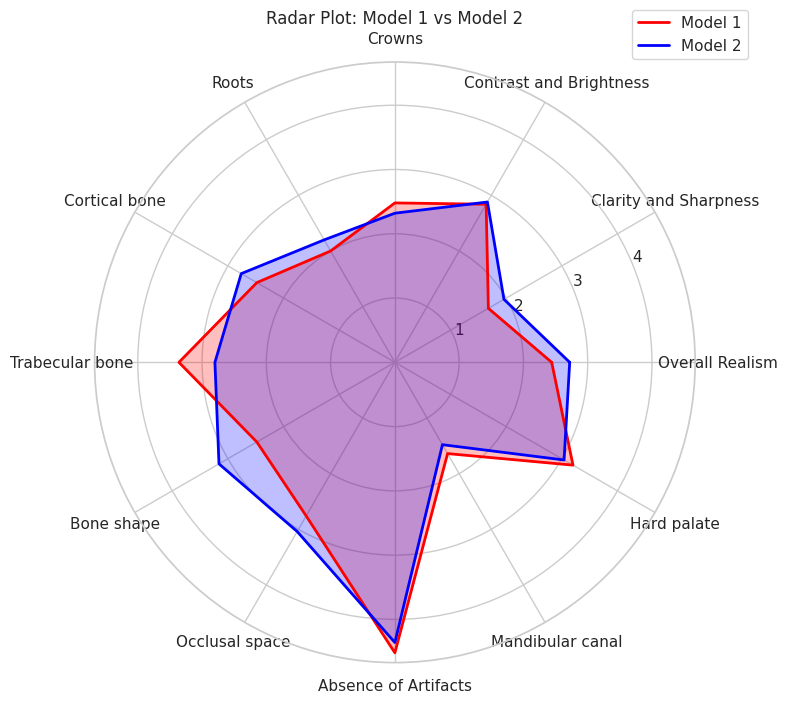

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to prepare model dataframes and calculate comparison table
def prepare_model_dataframes(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Prepare dataframes for each model
    model_1_df = df.iloc[::4]  # Model 1 (images 1, 5, 9...)
    model_2_df = df.iloc[1::4]  # Model 2 (images 2, 6, 10...)

    return model_1_df, model_2_df

def aggregate_scores(model_df):
    # Exclude the 'img_file' column and compute the mean score for each metric
    return model_df.drop(columns=['img_file']).mean()

def plot_radar_chart(model_1_agg, model_2_agg, metrics):
    # Create the figure and polar axis
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Number of variables
    num_vars = len(metrics)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is circular, so we need to "close the loop" by repeating the first value at the end
    model_1_agg = np.concatenate((model_1_agg, [model_1_agg[0]]))
    model_2_agg = np.concatenate((model_2_agg, [model_2_agg[0]]))
    angles += angles[:1]

    # Draw one line per model (Model 1 and Model 2) and fill the area
    ax.fill(angles, model_1_agg, color='red', alpha=0.25)
    ax.fill(angles, model_2_agg, color='blue', alpha=0.25)
    ax.plot(angles, model_1_agg, color='red', linewidth=2, label='Model 1')
    ax.plot(angles, model_2_agg, color='blue', linewidth=2, label='Model 2')

    # Add the metric labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics)

    # Set title, legends, and layout
    plt.title('Radar Plot: Model 1 vs Model 2')
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

    # Show the plot
    plt.tight_layout()
    plt.savefig('radar_plot_models_1_and_2.pdf')
    plt.show()

# Main workflow
file_path = 'results.xlsx'  # Replace with the actual path of your file
model_1, model_2 = prepare_model_dataframes(file_path)

# Aggregate the scores for both models
model_1_agg = aggregate_scores(model_1).values
model_2_agg = aggregate_scores(model_2).values
metrics = model_1.drop(columns=['img_file']).columns.tolist()  # List of metric names

# Plot the radar chart comparing Models 1 and 2
plot_radar_chart(model_1_agg, model_2_agg, metrics)


<ipython-input-30-6a60e8efa91f>:29: UserWarning:


The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.

<ipython-input-30-6a60e8efa91f>:35: UserWarning:


The palette list has fewer values (6) than needed (12) and will cycle, which may produce an uninterpretable plot.



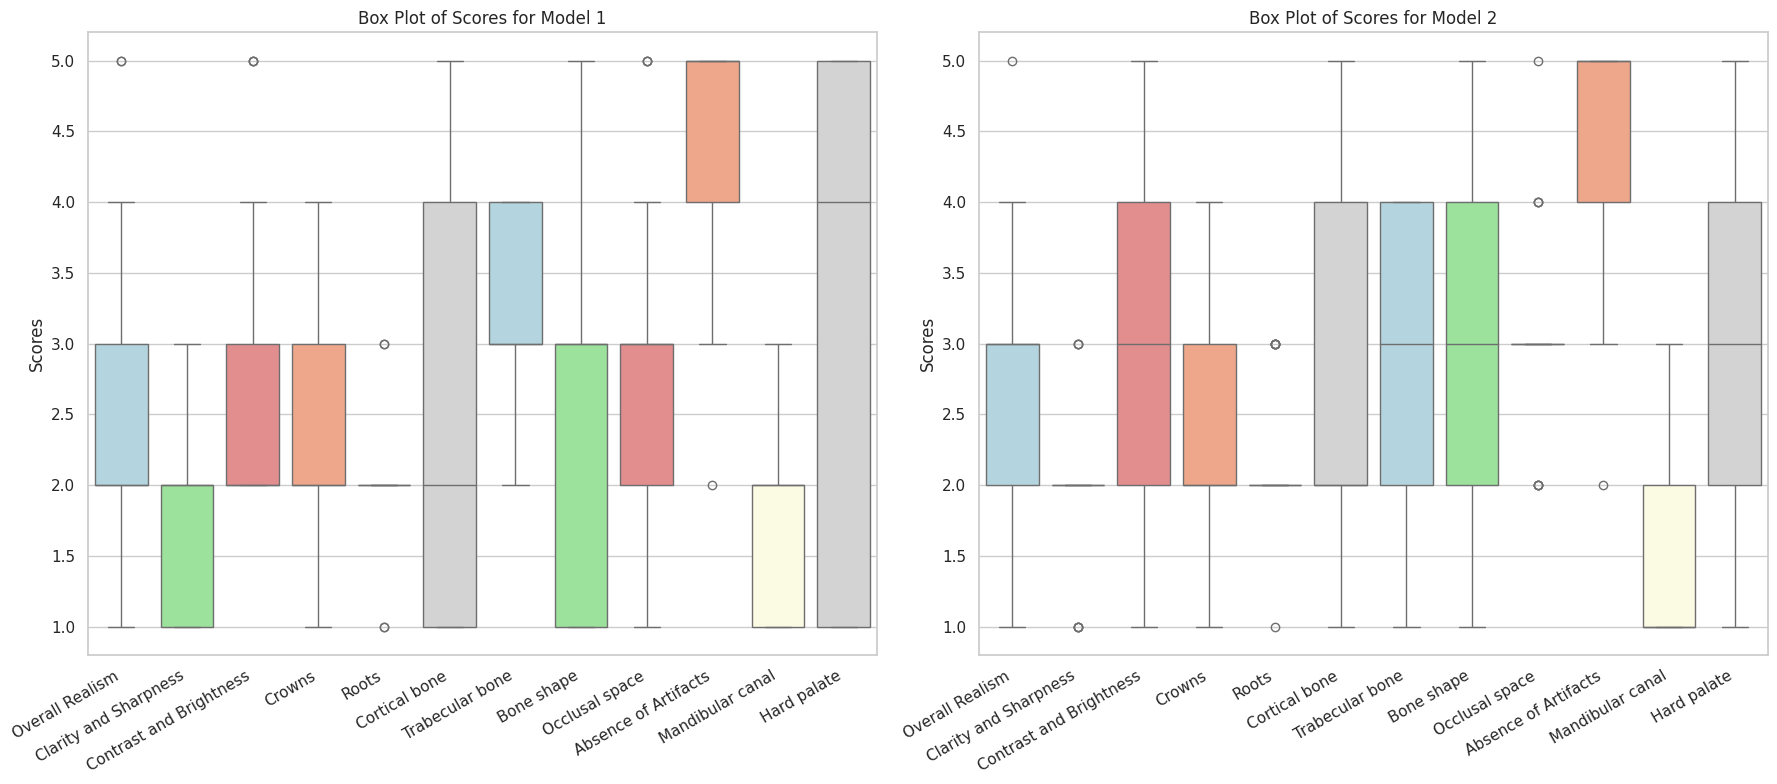

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to prepare model dataframes and calculate comparison table
def prepare_model_dataframes(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Prepare dataframes for each model
    model_1_df = df.iloc[::4]  # Model 1 (images 1, 5, 9...)
    model_2_df = df.iloc[1::4]  # Model 2 (images 2, 6, 10...)

    return model_1_df, model_2_df

def plot_model_boxplots(model_1, model_2):
    # Exclude the 'img_file' column
    model_1_data = model_1.drop(columns=['img_file'])
    model_2_data = model_2.drop(columns=['img_file'])

    # Define the custom color palette in the desired sequence
    custom_palette = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightyellow', 'lightgrey']

    # Create a wider figure for both boxplots
    plt.figure(figsize=(18, 8))  # Increased width for better label spacing

    # Create two subplots for each model
    plt.subplot(1, 2, 1)  # First subplot for Model 1
    sns.boxplot(data=model_1_data, palette=custom_palette[:len(model_1_data.columns)])  # Apply custom palette for Model 1
    plt.title('Box Plot of Scores for Model 1')
    plt.ylabel('Scores')
    plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels and align them for better readability

    plt.subplot(1, 2, 2)  # Second subplot for Model 2
    sns.boxplot(data=model_2_data, palette=custom_palette[:len(model_2_data.columns)])  # Apply custom palette for Model 2
    plt.title('Box Plot of Scores for Model 2')
    plt.ylabel('Scores')
    plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels and align them for better readability

    # Adjust layout and save as a PDF
    plt.tight_layout()
    plt.savefig('models_boxplots_comparison.pdf')

    # Show the plots
    plt.show()

# Main workflow
file_path = 'results.xlsx'  # Replace with the actual path of your file
model_1, model_2 = prepare_model_dataframes(file_path)

# Plot box plots for both models and save as PDF
plot_model_boxplots(model_1, model_2)


## Comment 4 - I had a look back at the info I have about the four models. I am quite convinced that all of them have FEATURES_GEN = 128 (they played around with other values but at some point they fixed it at 256x256 with 128 features. For 'Model 1' I do not have info on the amount of epochs they trained it on, or which value for CRITIC_ITERATIONS they used. The latter might be '2' (as in their github code), but for the former the code states 1000 epochs but the other models were trained using far fewer epochs. We can check this with them

Response - Email sent to the team

## Comment 5 - Models 2-4 are trained on data that was denoised using Anisotropic Diffusion. I provided them slightly, medium and strongly denoised versions of the images, and I am not sure which they selected here (also something to check). What they also seemed to vary is something they called 'Crit' (which I assume refers to CRITIC_ITERATIONS) and the amount of epochs.

Reponse - For paper, I think we need more information to add for anisotropic diffusion.

## Comment 6 - I made a first pass of the paper; most of my changes were in the introduction (some additional context and restructuring). When you have analyzed the scores per model, we can meet to go over a few things. Please just analyze the scores in a tabular way (can be in Excel), no need to make or remake graphs at this point

Response - Addressed in comment 3